In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - 209 data

### Reading the files and extracting relevant information:

In [3]:
plant = "AM"
xls_files = {}

xls = pd.ExcelFile(
    f"../../../data/raw/209/EMBRAPII hubIC IACC_CIMENTO_{plant}.xlsx",
    engine="openpyxl",
)
xls_files[plant] = xls

<IPython.core.display.Javascript object>

In [4]:
for plant, xls in xls_files.items():
    print("Palnt: ", plant, xls.sheet_names)

Palnt:  AM ['INSTRUÇÕES', 'Clínquer', '185', '96', '15', '22', '20', '57', '107', '64']


<IPython.core.display.Javascript object>

In [5]:
cement_types_per_plant = []
CEMENT_TYPE_COLS = ["Tipo de cimento", "Classe de resistência"]
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[2:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[1, 2])

        if not df[CEMENT_TYPE_COLS].iloc[2:].isna().all().all():
            cement_type = (
                df[CEMENT_TYPE_COLS]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .str.replace("nan", "")
                .unique()
            )

        else:
            cement_type = (
                df[[("Obs.", "Unnamed: 8_level_1")]]
                .loc[2:]
                .astype(str)
                .sum(axis=1)
                .str.replace(" ", "")
                .str.replace("-", "")
                .unique()
            )

        cement_types_per_plant.append((plant, sheet_name, cement_type))
        dataframes.append(df)

<IPython.core.display.Javascript object>

In [6]:
cement_types_per_plant

[('AM', '185', array(['CPIIF40'], dtype=object)),
 ('AM', '96', array(['CPIV32'], dtype=object)),
 ('AM', '15', array(['CPVARI'], dtype=object)),
 ('AM', '22', array(['CPIIF32'], dtype=object)),
 ('AM', '20', array(['CPIIFFIBRO40'], dtype=object)),
 ('AM', '57', array(['CPIIZ32'], dtype=object)),
 ('AM', '107', array(['CPIIZ40'], dtype=object)),
 ('AM', '64', array(['CPVARI'], dtype=object))]

<IPython.core.display.Javascript object>

In [7]:
cements = []
for tup in cement_types_per_plant:
    cements.append(tup[2][0])
Counter(cements)

Counter({'CPVARI': 2,
         'CPIIF40': 1,
         'CPIV32': 1,
         'CPIIF32': 1,
         'CPIIFFIBRO40': 1,
         'CPIIZ32': 1,
         'CPIIZ40': 1})

<IPython.core.display.Javascript object>

In [8]:
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[2:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[0, 1, 2])
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"] = plant
        dataframes.append(df.drop([0, 1], axis=0).reset_index(drop=True).copy())

<IPython.core.display.Javascript object>

In [9]:
df = pd.concat(dataframes, axis=0).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [10]:
df["Dados iniciais"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   (Cidade, Unnamed: 1_level_2)                 4141 non-null   object        
 1   (Data, Produção)                             4141 non-null   datetime64[ns]
 2   (Horário, Produção)                          4141 non-null   object        
 3   (Data, Medida)                               4141 non-null   datetime64[ns]
 4   (Horário, Medida)                            4141 non-null   object        
 5   (Tipo de cimento, Unnamed: 6_level_2)        4141 non-null   object        
 6   (Classe de resistência, Unnamed: 7_level_2)  4141 non-null   object        
 7   (Obs., Unnamed: 8_level_2)                   4141 non-null   object        
dtypes: datetime64[ns](2), object(6)
memory usage: 258.9+ KB


<IPython.core.display.Javascript object>

In [11]:
df["Materiais cimentícios suplementares"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   (Fíler calcário, CaO)              0 non-null      float64
 1   (Fíler calcário, SO2)              0 non-null      float64
 2   (Fíler calcário, K2O)              0 non-null      float64
 3   (Fíler calcário, MgO)              0 non-null      float64
 4   (Fíler calcário, Na2O)             0 non-null      float64
 5   (Fíler calcário, SiO2)             0 non-null      float64
 6   (Fíler calcário, Al2O3)            0 non-null      float64
 7   (Fíler calcário, Fe2O3)            0 non-null      float64
 8   (Fíler calcário, Perda ao fogo)    0 non-null      float64
 9   (Fíler calcário, Calcita)          0 non-null      float64
 10  (Fíler calcário, Dolomita)         0 non-null      float64
 11  (Fíler calcário, Quartzo)          0 non-null      float

<IPython.core.display.Javascript object>

In [12]:
df["Cimento"]["Composição"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Clínquer           0 non-null      float64
 1   Fíler calcário     0 non-null      float64
 2   Cinza volante      0 non-null      float64
 3   Escória            0 non-null      float64
 4   Argila calcinada   0 non-null      float64
 5   Sulfato de cálcio  502 non-null    float64
 6   Obs.               0 non-null      float64
dtypes: float64(7)
memory usage: 226.6 KB


<IPython.core.display.Javascript object>

In [13]:
df["Cimento"]["Análise química"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaO                4139 non-null   object 
 1   MgO                4141 non-null   object 
 2   Na2O               4139 non-null   object 
 3   Al2O3              4139 non-null   object 
 4   SiO2               4139 non-null   object 
 5   SO3                4128 non-null   object 
 6   K2O                4139 non-null   object 
 7   TiO2               0 non-null      float64
 8   Fe2O3              4139 non-null   object 
 9   Perda ao fogo      4114 non-null   object 
 10  Resíduo insolúvel  4141 non-null   object 
 11  Obs.               0 non-null      float64
dtypes: float64(2), object(10)
memory usage: 388.3+ KB


<IPython.core.display.Javascript object>

In [14]:
df["Cimento"]["Análise mineralógica"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C3S total          2789 non-null   object 
 1   C2S total          313 non-null    float64
 2   C2S alpha          0 non-null      float64
 3   C2S beta           59 non-null     float64
 4   C2S gama           0 non-null      float64
 5   C4AF               2848 non-null   object 
 6   C3A                415 non-null    float64
 7   C3A cubic          1895 non-null   object 
 8   C3A orto           1895 non-null   object 
 9   CaO livre          2850 non-null   object 
 10  Portlandita        2848 non-null   object 
 11  Periclasio         1954 non-null   object 
 12  Arcanita           0 non-null      float64
 13  Aphthalita         1954 non-null   object 
 14  Langbeinita        1954 non-null   object 
 15  Sulfato de cálcio  0 non-null      float64
 16  Bassanita          1641 

<IPython.core.display.Javascript object>

In [15]:
df["Cimento"].columns

MultiIndex([(          'Composição',          'Clínquer'),
            (          'Composição',    'Fíler calcário'),
            (          'Composição',     'Cinza volante'),
            (          'Composição',           'Escória'),
            (          'Composição',  'Argila calcinada'),
            (          'Composição', 'Sulfato de cálcio'),
            (          'Composição',              'Obs.'),
            (     'Análise química',               'CaO'),
            (     'Análise química',               'MgO'),
            (     'Análise química',              'Na2O'),
            (     'Análise química',             'Al2O3'),
            (     'Análise química',              'SiO2'),
            (     'Análise química',               'SO3'),
            (     'Análise química',               'K2O'),
            (     'Análise química',              'TiO2'),
            (     'Análise química',             'Fe2O3'),
            (     'Análise química',     'Perda ao fogo'

<IPython.core.display.Javascript object>

In [16]:
df["Característias físicas do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Unnamed: 136_level_1, Blaine)            4141 non-null   object 
 1   (Unnamed: 137_level_1, #200)              3914 non-null   object 
 2   (Unnamed: 138_level_1, #325)              4114 non-null   object 
 3   (Unnamed: 139_level_1, #400)              623 non-null    float64
 4   (Unnamed: 140_level_1, Massa específica)  0 non-null      float64
 5   (Unnamed: 141_level_1, Obs.)              0 non-null      float64
dtypes: float64(3), object(3)
memory usage: 194.2+ KB


<IPython.core.display.Javascript object>

In [17]:
df["Propriedades do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (Tempo de pega, Inicio)           4141 non-null   int64  
 1   (Tempo de pega, Fim)              4141 non-null   int64  
 2   (Resistência à compressão, 1 d)   991 non-null    float64
 3   (Resistência à compressão, 3 d)   4141 non-null   object 
 4   (Resistência à compressão, 7 d)   4141 non-null   object 
 5   (Resistência à compressão, 28 d)  4141 non-null   object 
 6   (Obs., Unnamed: 148_level_2)      0 non-null      float64
dtypes: float64(2), int64(2), object(3)
memory usage: 226.6+ KB


<IPython.core.display.Javascript object>

In [18]:
def convert_to_float(value):
    try:
        # If it's a string enclosed in single quotes, remove quotes and replace comma with dot
        if isinstance(value, str):
            return float(value.replace(",", "."))
        else:
            return float(value)
    except ValueError as e:
        print(e)
        return float("nan")

<IPython.core.display.Javascript object>

In [19]:
df = pd.concat(
    [
        df["Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"],
        df["Dados iniciais"],
        df["Cimento"]["Composição"].rename(
            {"Sulfato de cálcio": "Sulfato de cálcio (composição)"}, axis=1
        ),
        df["Cimento"]["Análise mineralógica"],
        df["Cimento"]["Análise química"],
        df["Característias físicas do cimento"],
        df["Propriedades do cimento"],
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4141 entries, 0 to 4140
Data columns (total 64 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (Unnamed: 0_level_0, Unnamed: 0_level_1, Unnamed: 0_level_2)  4141 non-null   object 
 1   (Cidade, Unnamed: 1_level_2)                                  4141 non-null   object 
 2   (Data, Produção)                                              4141 non-null   object 
 3   (Horário, Produção)                                           4141 non-null   object 
 4   (Data, Medida)                                                4141 non-null   object 
 5   (Horário, Medida)                                             4141 non-null   object 
 6   (Tipo de cimento, Unnamed: 6_level_2)                         4141 non-null   object 
 7   (Classe de resistência, Unnamed: 7_level_2)                   4141 no

<IPython.core.display.Javascript object>

In [21]:
COLUMNS_TO_DROP = [
    ("Data", "Medida"),
    ("Horário", "Produção"),
    ("Horário", "Medida"),
    ("Obs.", "Unnamed: 148_level_2"),
    ("Tipo de cimento", "Unnamed: 6_level_2"),
    ("Classe de resistência", "Unnamed: 7_level_2"),
    ("Obs.", "Unnamed: 8_level_2"),
    "Obs.",
    ("Obs.", "Unnamed: 148_level_2"),
    ("Unnamed: 141_level_1", "Obs."),
    # ("Unnamed: 139_level_1", "#400"),
]

COLUMNS_TO_RENAME = {
    ("Unnamed: 0_level_0", "Unnamed: 0_level_1", "Unnamed: 0_level_2"): "Plant",
    ("Cidade", "Unnamed: 1_level_2"): "City",
    ("Data", "Produção"): "Date",  # Arrumar!
    ("Unnamed: 136_level_1", "Blaine"): "Blaine",
    ("Unnamed: 137_level_1", "#200"): "#200",
    ("Unnamed: 138_level_1", "#325"): "#325",
    ("Unnamed: 139_level_1", "#400"): "#400",
    ("Unnamed: 140_level_1", "Massa específica"): "Specific Gravity",
    ("Tempo de pega", "Inicio"): "Initial setting time",
    ("Tempo de pega", "Fim"): "Final setting time",
    ("Resistência à compressão", "1 d"): "CS1",
    ("Resistência à compressão", "3 d"): "CS3",
    ("Resistência à compressão", "7 d"): "CS7",
    ("Resistência à compressão", "28 d"): "CS28",
    "Perda ao fogo": "Loss on Ignition",
    "Resíduo insolúvel": "Insoluble Residue",
    "Clínquer": "Clinker",
    "Fíler calcário": "Calcareous filler",
    "Cinza volante": "Fly ash",
    "Escória": "Slag",
    "Argila calcinada": "Calcined clay",
    "Sulfato de cálcio": "Calcium sulfate",
    "C3S total": "Total C3S",
    "C2S total": "Total C2S",
    "C2S alpha": "Alpha C2S",
    "C2S beta": "Beta C2S",
    "C2S gama": "Gamma C2S",
    "C4AF": "C4AF",
    "C3A": "C3A",
    "C3A cubic": "Cubic C3A",
    "C3A orto": "Orthorhombic C3A",
    "CaO livre": "Free CaO",
    "Portlandita": "Portlandite",
    "Periclasio": "Periclase",
    "Arcanita": "Arcanite",
    "Aphthalita": "Aphthitalite",
    "Langbeinita": "Langbeinite",
    "Bassanita": "Bassanite",
    "Anidrita": "Anhydrite",
    "Calcita": "Calcite",
    "Dolomita": "Dolomite",
    "Quartzo": "Quartz",
    "Muscovita": "Muscovite",
    "Sulfato de cálcio (composição)": "Calcium sulfate (composition)",
}

# Single variable for the Cement Type
df["Cement_Type"] = (
    df[
        [
            ("Tipo de cimento", "Unnamed: 6_level_2"),
            ("Classe de resistência", "Unnamed: 7_level_2"),
            ("Obs.", "Unnamed: 8_level_2"),
        ]
    ]
    .fillna("")
    .astype(str)
    .sum(axis=1)
)

df = df.drop(COLUMNS_TO_DROP, axis=1).rename(COLUMNS_TO_RENAME, axis=1).copy()
df = df.drop([0]).reset_index(drop=True)
df = df.infer_objects()

<IPython.core.display.Javascript object>

In [22]:
def preprocess_numeric_cols(df, columns):
    for col in columns:
        df[col] = df[col].astype(str)  # Ensure string type for string operations
        df[col] = df[col].str.replace("#", "")  # Remove '#' characters
        df[col] = df[col].str.replace(",", ".")  # Replace ',' with '.' for decimals
    return df

<IPython.core.display.Javascript object>

In [23]:
NUMERIC_COLUMNS = [
    "Calcium sulfate (composition)",
    "Clinker",
    "Calcareous filler",
    "Fly ash",
    "Slag",
    "Calcined clay",
    "Calcium sulfate",
    "Total C3S",
    "Total C2S",
    "Alpha C2S",
    "Beta C2S",
    "Gamma C2S",
    "C4AF",
    "C3A",
    "Cubic C3A",
    "Orthorhombic C3A",
    "Free CaO",
    "Portlandite",
    "Periclase",
    "Arcanite",
    "Aphthitalite",
    "Langbeinite",
    "Bassanite",
    "Anhydrite",
    "Calcite",
    "Dolimita",
    "Quartz",
    "Muscovite",
    "CaO",
    "MgO",
    "Na2O",
    "Al2O3",
    "SiO2",
    "SO3",
    "K2O",
    "TiO2",
    "Fe2O3",
    "Loss on Ignition",
    "Insoluble Residue",
    "Blaine",
    "#200",
    "#325",
    "#400",
    "Specific Gravity",
    "Final setting time",
    "Initial setting time",
    "CS1",
    "CS3",
    "CS7",
    "CS28",
]

df = preprocess_numeric_cols(df, NUMERIC_COLUMNS)

# Preprocessing to fix numeric columns
df[NUMERIC_COLUMNS] = df[NUMERIC_COLUMNS].map(convert_to_float)

# Converting Date to pandas datetime
df["Date"] = pd.to_datetime(df["Date"])

# Drop rows completely missing
index_to_keep = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
)
df = df.iloc[index_to_keep].reset_index(drop=True)

df = df.infer_objects()

could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string 

<IPython.core.display.Javascript object>

# EDA

In [24]:
df.shape

(4140, 54)

<IPython.core.display.Javascript object>

In [25]:
df.head()

Plant               City       Date  Clinker  Calcareous filler  Fly ash  \
0    AM  Rio Branco do Sul 2021-01-05      NaN                NaN      NaN   
1    AM  Rio Branco do Sul 2021-01-06      NaN                NaN      NaN   
2    AM  Rio Branco do Sul 2021-01-07      NaN                NaN      NaN   
3    AM  Rio Branco do Sul 2021-01-08      NaN                NaN      NaN   
4    AM  Rio Branco do Sul 2021-01-11      NaN                NaN      NaN   

   Slag  Calcined clay  Calcium sulfate (composition)  Total C3S  ...  #325  \
0   NaN            NaN                            NaN        NaN  ...   3.0   
1   NaN            NaN                            NaN        NaN  ...   0.3   
2   NaN            NaN                            NaN        NaN  ...   0.2   
3   NaN            NaN                            NaN        NaN  ...   0.3   
4   NaN            NaN                            NaN        NaN  ...   0.4   

   #400  Specific Gravity  Initial setting time  Final setting time   CS1  \
0   1.1               NaN                 255.0               325.0  24.8   
1   1.1               NaN                 260.0               330.0  25.6   
2   0.8               NaN                 255.0               325.0  24.5   
3   1.3               NaN                 255.0               325.0  25.0   
4   1.3               NaN                 260.0               330.0  23.9   

    CS3   CS7  CS28        Cement_Type  
0  34.3  38.1  47.0  CP II-F40Expedido  
1  34.4  38.3  47.0  CP II-F40Expedido  
2  35.5  39.1  47.4  CP II-F40Expedido  
3  33.9  37.8  47.1  CP II-F40Expedido  
4  33.7  38.3  47.0  CP II-F40Expedido  

[5 rows x 54 columns]

<IPython.core.display.Javascript object>

In [26]:
df.tail()

Plant               City       Date  Clinker  Calcareous filler  Fly ash  \
4135    AM  Rio Branco do Sul 2023-08-05      NaN                NaN      NaN   
4136    AM  Rio Branco do Sul 2023-08-07      NaN                NaN      NaN   
4137    AM  Rio Branco do Sul 2023-08-08      NaN                NaN      NaN   
4138    AM  Rio Branco do Sul 2023-08-09      NaN                NaN      NaN   
4139    AM  Rio Branco do Sul 2023-08-10      NaN                NaN      NaN   

      Slag  Calcined clay  Calcium sulfate (composition)  Total C3S  ...  \
4135   NaN            NaN                            NaN        NaN  ...   
4136   NaN            NaN                            NaN        NaN  ...   
4137   NaN            NaN                            NaN        NaN  ...   
4138   NaN            NaN                            NaN        NaN  ...   
4139   NaN            NaN                            NaN        NaN  ...   

      #325  #400  Specific Gravity  Initial setting time  Final setting time  \
4135   0.6   NaN               NaN                 260.0               320.0   
4136   0.8   NaN               NaN                 260.0               320.0   
4137   0.8   NaN               NaN                 260.0               320.0   
4138   0.8   NaN               NaN                 260.0               335.0   
4139   0.6   NaN               NaN                 270.0               330.0   

      CS1        CS3   CS7  CS28      Cement_Type  
4135  NaN  34.900002  40.5   NaN  CP VARIExpedido  
4136  NaN  35.700001  42.5   NaN  CP VARIExpedido  
4137  NaN  35.200001   NaN   NaN  CP VARIExpedido  
4138  NaN  34.400002   NaN   NaN  CP VARIExpedido  
4139  NaN  35.700001   NaN   NaN  CP VARIExpedido  

[5 rows x 54 columns]

<IPython.core.display.Javascript object>

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Plant                          4140 non-null   object        
 1   City                           4140 non-null   object        
 2   Date                           4140 non-null   datetime64[ns]
 3   Clinker                        0 non-null      float64       
 4   Calcareous filler              0 non-null      float64       
 5   Fly ash                        0 non-null      float64       
 6   Slag                           0 non-null      float64       
 7   Calcined clay                  0 non-null      float64       
 8   Calcium sulfate (composition)  502 non-null    float64       
 9   Total C3S                      495 non-null    float64       
 10  Total C2S                      313 non-null    float64       
 11  Alpha C2S        

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [28]:
df.dtypes.value_counts()

float64           50
object             3
datetime64[ns]     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [29]:
df.describe().transpose()

count                           mean  \
Date                             4140  2022-05-03 10:47:18.260869632   
Clinker                           0.0                            NaN   
Calcareous filler                 0.0                            NaN   
Fly ash                           0.0                            NaN   
Slag                              0.0                            NaN   
Calcined clay                     0.0                            NaN   
Calcium sulfate (composition)   502.0                       3.979124   
Total C3S                       495.0                      54.251434   
Total C2S                       313.0                       9.552652   
Alpha C2S                         0.0                            NaN   
Beta C2S                         59.0                       4.770678   
Gamma C2S                         0.0                            NaN   
C4AF                           1383.0                        8.65598   
C3A                             415.0                       4.280651   
Cubic C3A                       708.0                       3.636723   
Orthorhombic C3A                708.0                       0.109661   
Free CaO                       1385.0                       0.661718   
Portlandite                    1461.0                        0.33666   
Periclase                       773.0                       4.683816   
Arcanite                          0.0                            NaN   
Aphthitalite                    773.0                       0.615511   
Langbeinite                     773.0                       0.673234   
Calcium sulfate                   0.0                            NaN   
Bassanite                       443.0                       0.760745   
Anhydrite                       313.0                       0.236677   
Calcite                           0.0                            NaN   
Dolimita                        768.0                       1.287852   
Quartz                          313.0                       3.101757   
Muscovite                         0.0                            NaN   
CaO                            4135.0                      55.235781   
MgO                            4126.0                       5.939569   
Na2O                           4124.0                        0.17678   
Al2O3                          4135.0                       5.389044   
SiO2                           4135.0                      20.775654   
SO3                            4124.0                        2.88884   
K2O                            4124.0                       1.066545   
TiO2                              0.0                            NaN   
Fe2O3                          4135.0                       2.968896   
Loss on Ignition               4110.0                       5.584941   
Insoluble Residue              4137.0                       7.484187   
Blaine                         4137.0                    4369.835146   
#200                           3872.0                       1.794757   
#325                           4110.0                       4.846178   
#400                            622.0                       2.531412   
Specific Gravity                  0.0                            NaN   
Initial setting time           4140.0                     265.676329   
Final setting time             4140.0                     333.629227   
CS1                             990.0                      20.925253   
CS3                            4139.0                      28.588741   
CS7                            4118.0                      33.624065   
CS28                           4025.0                      41.613138   

                                               min                  25%  \
Date                           2021-01-04 00:00:00  2021-09-09 00:00:00   
Clinker                                        NaN                  NaN   
Calcareous filler                              NaN            

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [30]:
df.describe(exclude="number").T

count unique                top  freq  \
Plant        4140      1                 AM  4140   
City         4140      1  Rio Branco do Sul  4140   
Date         4140    NaN                NaN   NaN   
Cement_Type  4140     10    CP VARIExpedido   853   

                                      mean                  min  \
Plant                                  NaN                  NaN   
City                                   NaN                  NaN   
Date         2022-05-03 10:47:18.260869632  2021-01-04 00:00:00   
Cement_Type                            NaN                  NaN   

                             25%                  50%                  75%  \
Plant                        NaN                  NaN                  NaN   
City                         NaN                  NaN                  NaN   
Date         2021-09-09 00:00:00  2022-05-17 00:00:00  2022-12-22 06:00:00   
Cement_Type                  NaN                  NaN                  NaN   

                             max  
Plant                        NaN  
City                         NaN  
Date         2023-08-17 00:00:00  
Cement_Type                  NaN

<IPython.core.display.Javascript object>

In [31]:
df["Plant"].unique()

array(['AM'], dtype=object)

<IPython.core.display.Javascript object>

In [32]:
df["Cement_Type"].unique()

array(['CP II-F40Expedido', 'CP IV32Expedido', 'CP VARIExpedido',
       'CPVARIExpedido', 'CP II-F32Expedido', 'CP II-F FIBRO40Expedido',
       'CP II-Z32Expedido DF2', 'CP II-Z32Expedido Linha 9',
       'CP II-Z40Expedido Linha 9', 'CP II-Z40Expedido Itajaí'],
      dtype=object)

<IPython.core.display.Javascript object>

In [33]:
df["City"].unique()

array(['Rio Branco do Sul'], dtype=object)

<IPython.core.display.Javascript object>

In [34]:
df["Plant"].value_counts()

Plant
AM    4140
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [35]:
df["Cement_Type"].value_counts()

Cement_Type
CP VARIExpedido              853
CP II-Z32Expedido DF2        650
CP II-F40Expedido            625
CP II-Z32Expedido Linha 9    613
CP II-F32Expedido            378
CP II-F FIBRO40Expedido      367
CP II-Z40Expedido Itajaí     290
CP IV32Expedido              258
CPVARIExpedido                74
CP II-Z40Expedido Linha 9     32
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [36]:
df["City"].value_counts()

City
Rio Branco do Sul    4140
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_2296666/3733926260.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


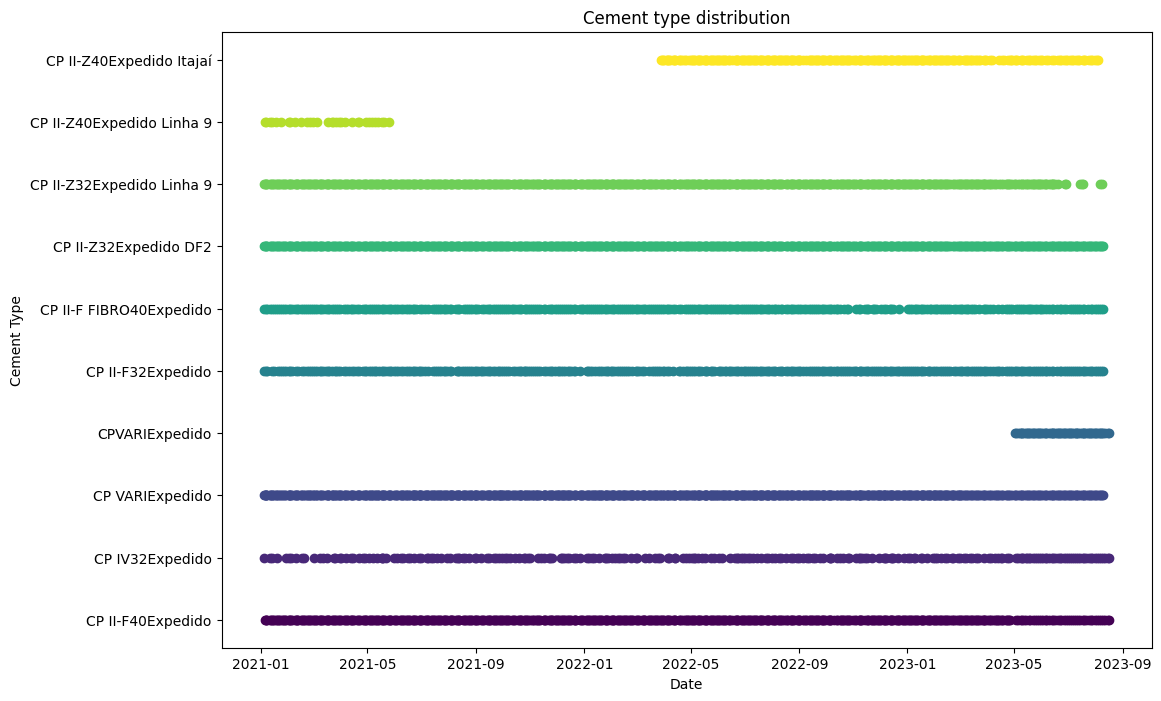

<IPython.core.display.Javascript object>

In [37]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
plt.show()

In [38]:
for cement_type in df["Cement_Type"].unique():
    print(cement_type)

CP II-F40Expedido
CP IV32Expedido
CP VARIExpedido
CPVARIExpedido
CP II-F32Expedido
CP II-F FIBRO40Expedido
CP II-Z32Expedido DF2
CP II-Z32Expedido Linha 9
CP II-Z40Expedido Linha 9
CP II-Z40Expedido Itajaí


<IPython.core.display.Javascript object>

In [39]:
df[(df["Cement_Type"] == "CP INDExpedido") | (df["Cement_Type"] == "CPINDCC")].groupby(
    "Cement_Type"
)["CS28"].describe()

Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []

<IPython.core.display.Javascript object>

In [40]:
df[(df["Cement_Type"] == "CP INDExpedido") | (df["Cement_Type"] == "CPINDCC") |
(df["Cement_Type"] == "CP I40Expedido")
  ].groupby("Cement_Type")["CS28"].describe()


Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []

<IPython.core.display.Javascript object>

In [41]:
df["Cement_Type"] = (
    df["Cement_Type"]
    .str.replace("Expedido", "")
    .str.replace("Linha 9", "")
    .str.replace("Itajaí", "")
    .str.replace("D-G", "")
    .str.replace("D-E", "")
    .str.replace("DF2", "")
    .str.replace("CPIIF40", "CP II-F-40")
    .str.replace("CP VARI", "CP V-ARI")
    .str.replace("CPVARI", "CP V-ARI")
    .str.replace("CP V-RSARI", "CP V-ARI RS")
    .str.replace("CP III-RS40", "CP III-40 RS")
    .str.replace("CP III-RS32", "CP III-32 RS")
    .str.replace("CP IV-RS32", "CP IV-32 RS")
    .str.replace("CP III40", "CP III-40")
    .str.replace("CP III32", "CP III-32")
    .str.replace("CP I-S40", "CP I-S-40")
    .str.replace("CP I40", "CP I-40")
    .str.replace("CP II-E32", "CP II-E-32")
    .str.replace("CP II-E40", "CP II-E-40")
    .str.replace("CP II-F FIBRO40", "CP II-F-40")
    .str.replace("CP II-F32", "CP II-F-32")
    .str.replace("CP II-F40", "CP II-F-40")
    .str.replace("CP II-Z32", "CP II-Z-32")
    .str.replace("CP II-Z40", "CP II-Z-40")
    .str.replace("CP IV32", "CP IV-32")
    .str.replace("CP IND", "CP I")
    .str.replace("CPINDCC", "CP I")
    .str.strip()
)

<IPython.core.display.Javascript object>

In [42]:
df["Cement_Type"].value_counts().sort_index()

Cement_Type
CP II-F-32     378
CP II-F-40     992
CP II-Z-32    1263
CP II-Z-40     322
CP IV-32       258
CP V-ARI       927
Name: count, dtype: int64

<IPython.core.display.Javascript object>

/tmp/ipykernel_2296666/3733926260.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


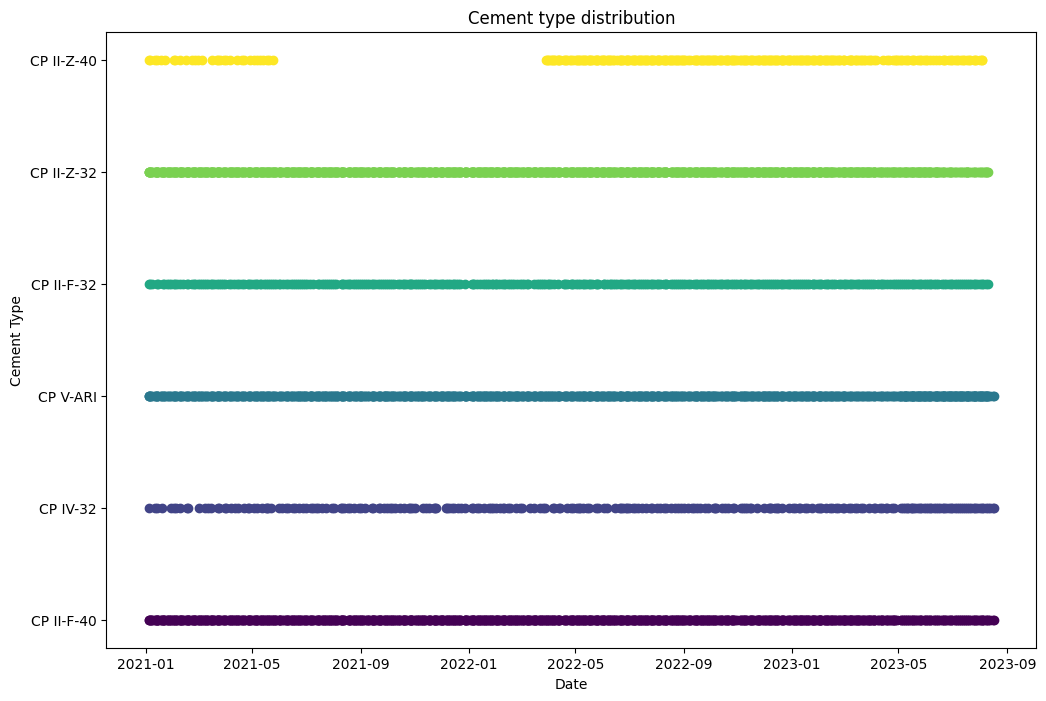

<IPython.core.display.Javascript object>

In [43]:
categories = df["Cement_Type"].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(categories)))

plt.figure(figsize=(12, 8))

for i, category in enumerate(categories):
    category_data = df[df["Cement_Type"] == category]
    plt.scatter(
        category_data["Date"], [i] * len(category_data), c=colors[i], label=category
    )
plt.yticks(range(len(categories)), categories)
# plt.legend()
plt.xlabel("Date")
plt.ylabel("Cement Type")
plt.title("Cement type distribution")
plt.show()

In [44]:
dates = df["Date"].copy()

<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

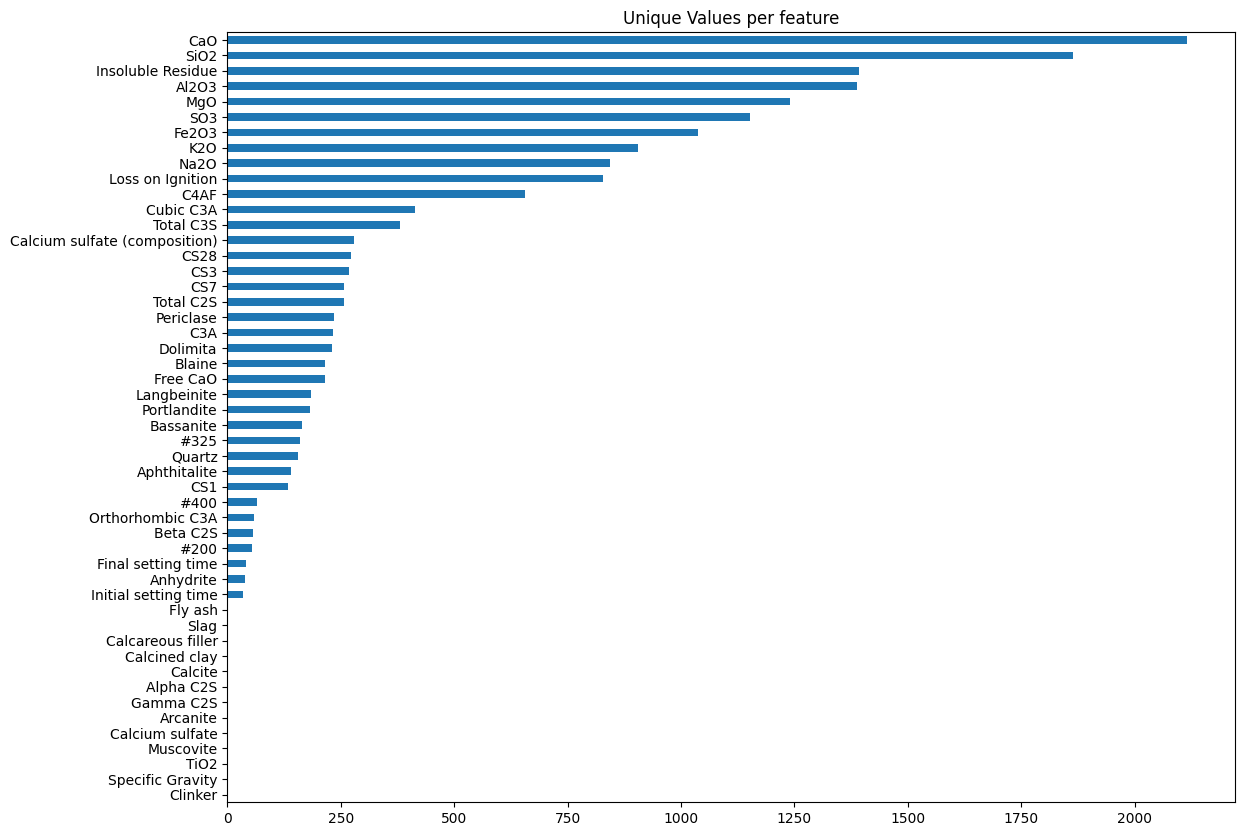

<IPython.core.display.Javascript object>

In [45]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Plant'),
  Text(1, 0, 'City'),
  Text(2, 0, 'Cement_Type'),
  Text(3, 0, 'Date')])

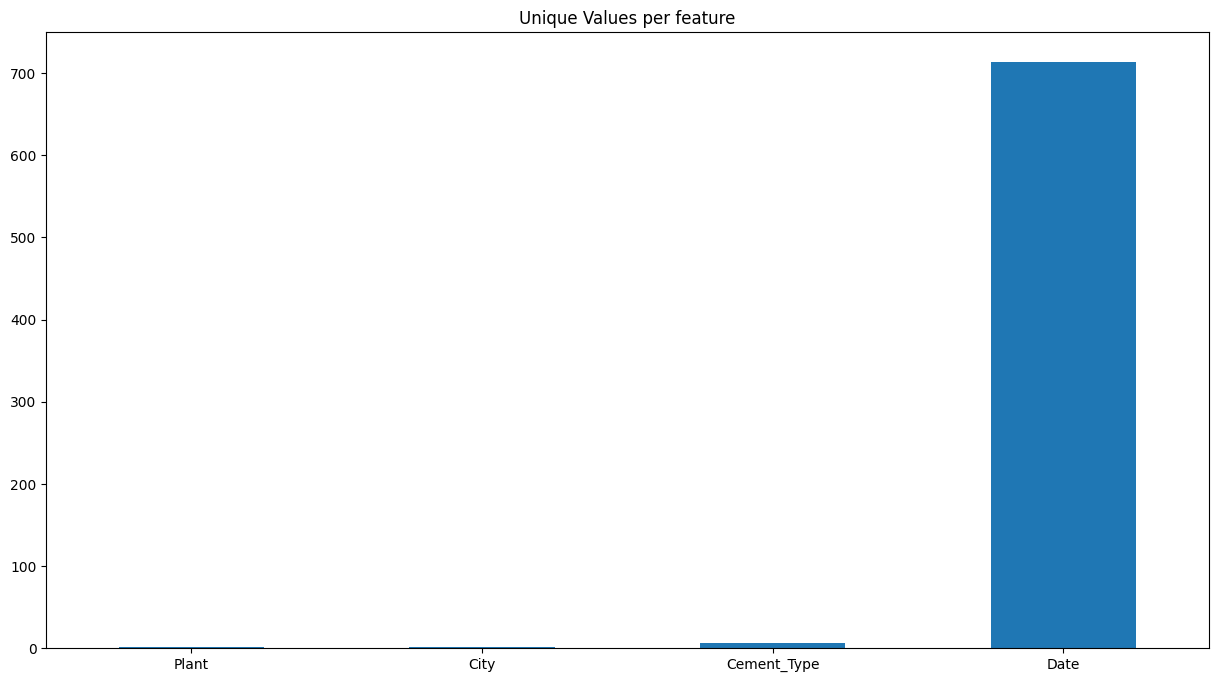

<IPython.core.display.Javascript object>

In [46]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

(array([0, 1, 2]),
 [Text(0, 0, 'Plant'), Text(1, 0, 'City'), Text(2, 0, 'Cement_Type')])

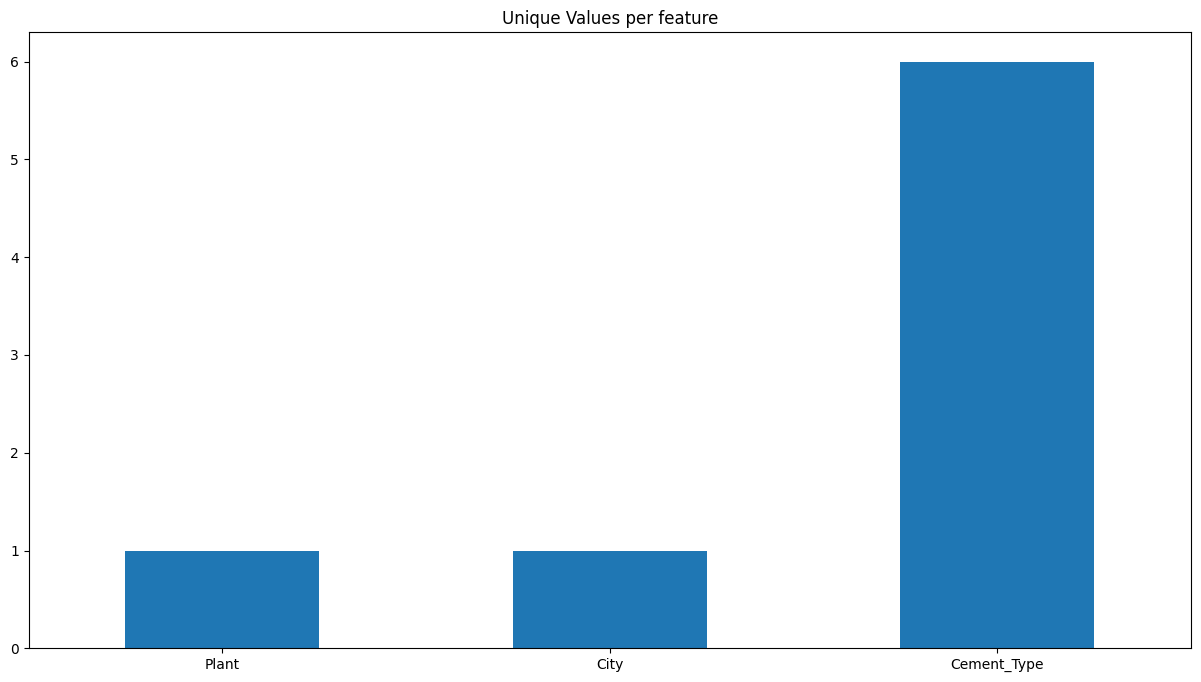

<IPython.core.display.Javascript object>

In [47]:
unique_values = (
    df.select_dtypes(exclude="number").drop("Date", axis=1).nunique().sort_values()
)

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [48]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 48 variables with missing values from a total of 54


<IPython.core.display.Javascript object>

In [49]:
df.isna().any()

Plant                            False
City                             False
Date                             False
Clinker                           True
Calcareous filler                 True
Fly ash                           True
Slag                              True
Calcined clay                     True
Calcium sulfate (composition)     True
Total C3S                         True
Total C2S                         True
Alpha C2S                         True
Beta C2S                          True
Gamma C2S                         True
C4AF                              True
C3A                               True
Cubic C3A                         True
Orthorhombic C3A                  True
Free CaO                          True
Portlandite                       True
Periclase                         True
Arcanite                          True
Aphthitalite                      True
Langbeinite                       True
Calcium sulfate                   True
Bassanite                

<IPython.core.display.Javascript object>

In [50]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [51]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<BarContainer object of 54 artists>

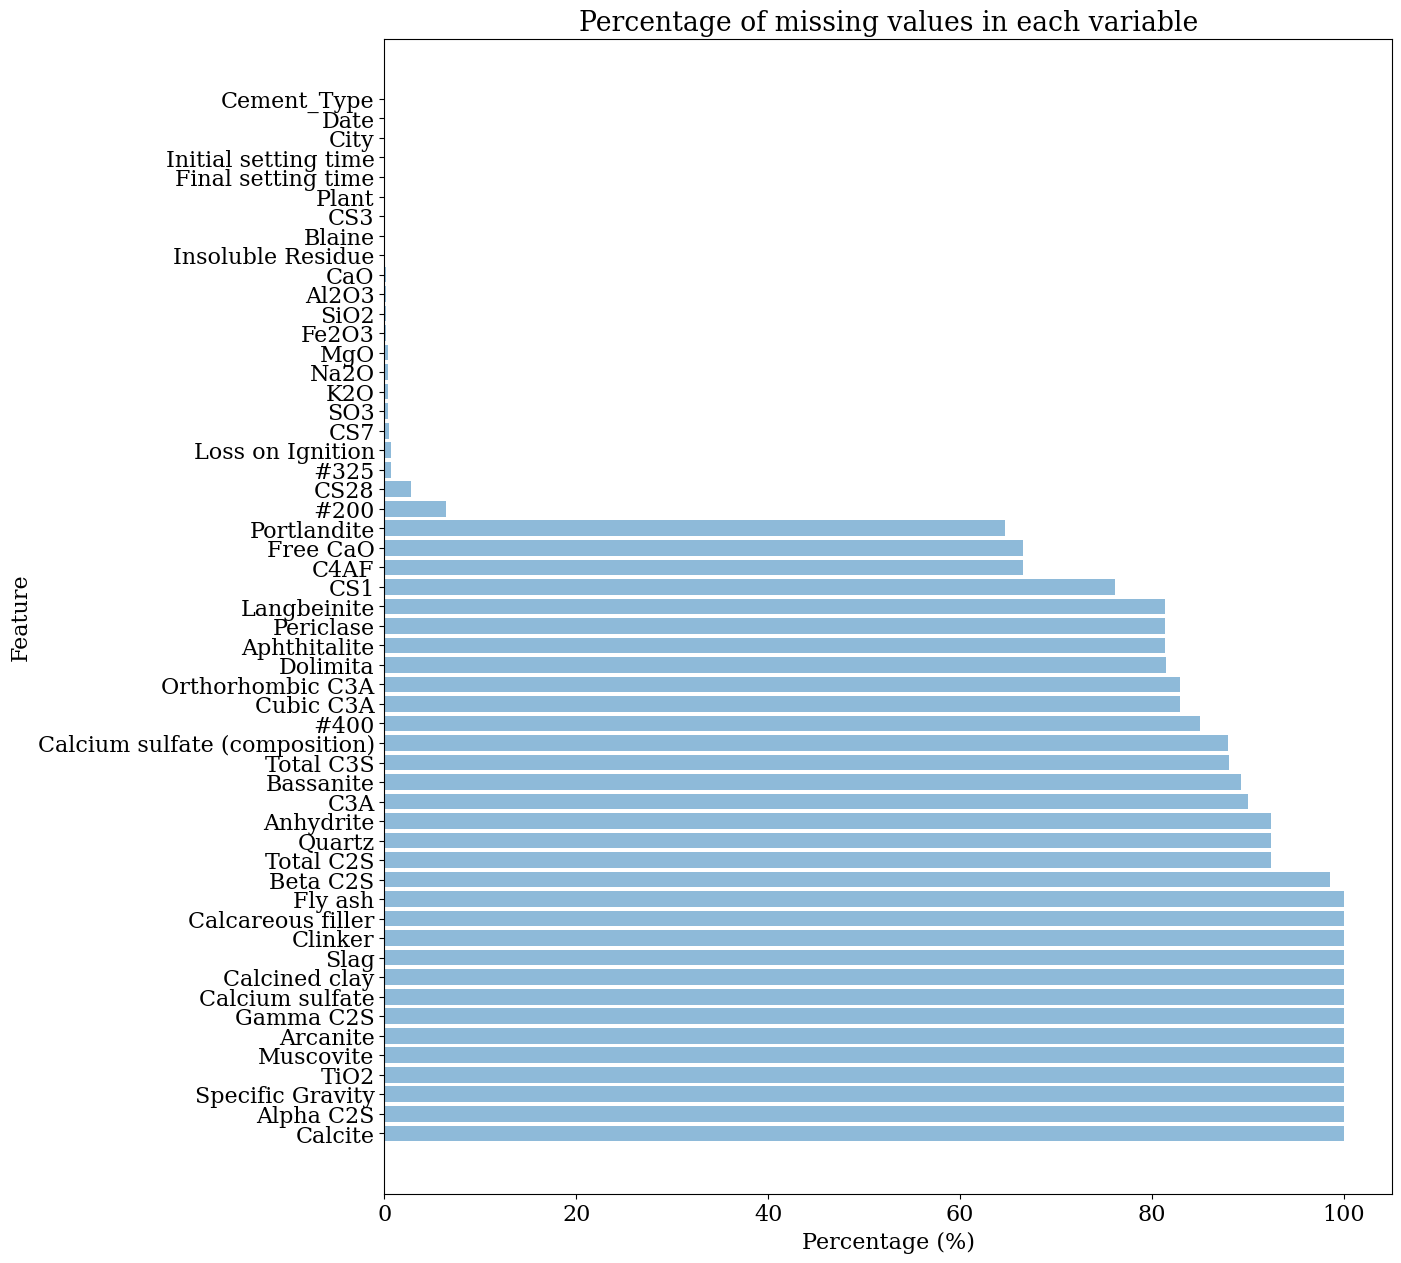

<IPython.core.display.Javascript object>

In [52]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

In [53]:
missing_values = []
for plant, group in df.groupby("Plant"):
    missing_percentages = (group.isna().sum() / group.shape[0]) * 100
    missing_percentages = missing_percentages.sort_values(ascending=False)
    missing_percentages = missing_percentages.to_frame(name=f"Missing (%) for {plant}")
    missing_values.append(missing_percentages.T)

result = pd.concat(missing_values)
result.T.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

## Percentage of zeros each variable

In [54]:
df.drop(["Date"], axis=1).select_dtypes(include="number").columns

Index(['Clinker', 'Calcareous filler', 'Fly ash', 'Slag', 'Calcined clay',
       'Calcium sulfate (composition)', 'Total C3S', 'Total C2S', 'Alpha C2S',
       'Beta C2S', 'Gamma C2S', 'C4AF', 'C3A', 'Cubic C3A', 'Orthorhombic C3A',
       'Free CaO', 'Portlandite', 'Periclase', 'Arcanite', 'Aphthitalite',
       'Langbeinite', 'Calcium sulfate', 'Bassanite', 'Anhydrite', 'Calcite',
       'Dolimita', 'Quartz', 'Muscovite', 'CaO', 'MgO', 'Na2O', 'Al2O3',
       'SiO2', 'SO3', 'K2O', 'TiO2', 'Fe2O3', 'Loss on Ignition',
       'Insoluble Residue', 'Blaine', '#200', '#325', '#400',
       'Specific Gravity', 'Initial setting time', 'Final setting time', 'CS1',
       'CS3', 'CS7', 'CS28'],
      dtype='object')

<IPython.core.display.Javascript object>

In [55]:
zero_values = {}
for col in df.select_dtypes(include="number").columns:
    zero_percentages = (df[df[col].eq(0)].shape[0] / df.shape[0]) * 100
    zero_values[col] = zero_percentages

zero_percentages = pd.Series(zero_values, name=f"Zero (%) for {plant}")
zero_percentages = zero_percentages.sort_values(ascending=False)
zero_percentages = zero_percentages.to_frame(name=f"Zero (%) for {plant}")
zero_percentages.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [56]:
zero_percentages

Zero (%) for AM
#200                                 28.985507
Orthorhombic C3A                     11.400966
Na2O                                  1.932367
Anhydrite                             0.483092
Bassanite                             0.338164
#325                                  0.241546
Insoluble Residue                     0.193237
Portlandite                           0.072464
#400                                  0.048309
K2O                                   0.024155
Blaine                                0.024155
Loss on Ignition                      0.024155
Langbeinite                           0.024155
Aphthitalite                          0.024155
SO3                                   0.000000
SiO2                                  0.000000
Al2O3                                 0.000000
Clinker                               0.000000
TiO2                                  0.000000
Fe2O3                                 0.000000
CaO                                   0.000000
Specific Gravity                      0.000000
Initial setting time                  0.000000
Final setting time                    0.000000
CS1                                   0.000000
CS3                                   0.000000
CS7                                   0.000000
MgO                                   0.000000
Dolimita                              0.000000
Muscovite                             0.000000
Gamma C2S                             0.000000
Fly ash                               0.000000
Slag                                  0.000000
Calcined clay                         0.000000
Calcium sulfate (composition)         0.000000
Total C3S                             0.000000
Total C2S                             0.000000
Alpha C2S                             0.000000
Beta C2S                              0.000000
C4AF                                  0.000000
Quartz                                0.000000
C3A                                   0.000000
Cubic C3A                             0.000000
Free CaO                              0.000000
Periclase                             0.000000
Arcanite                              0.000000
Calcium sulfate                       0.000000
Calcite                               0.000000
Calcareous filler                     0.000000
CS28                                  0.000000

<IPython.core.display.Javascript object>

<h3>2.4. Duplicates</h3>

In [57]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 9 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

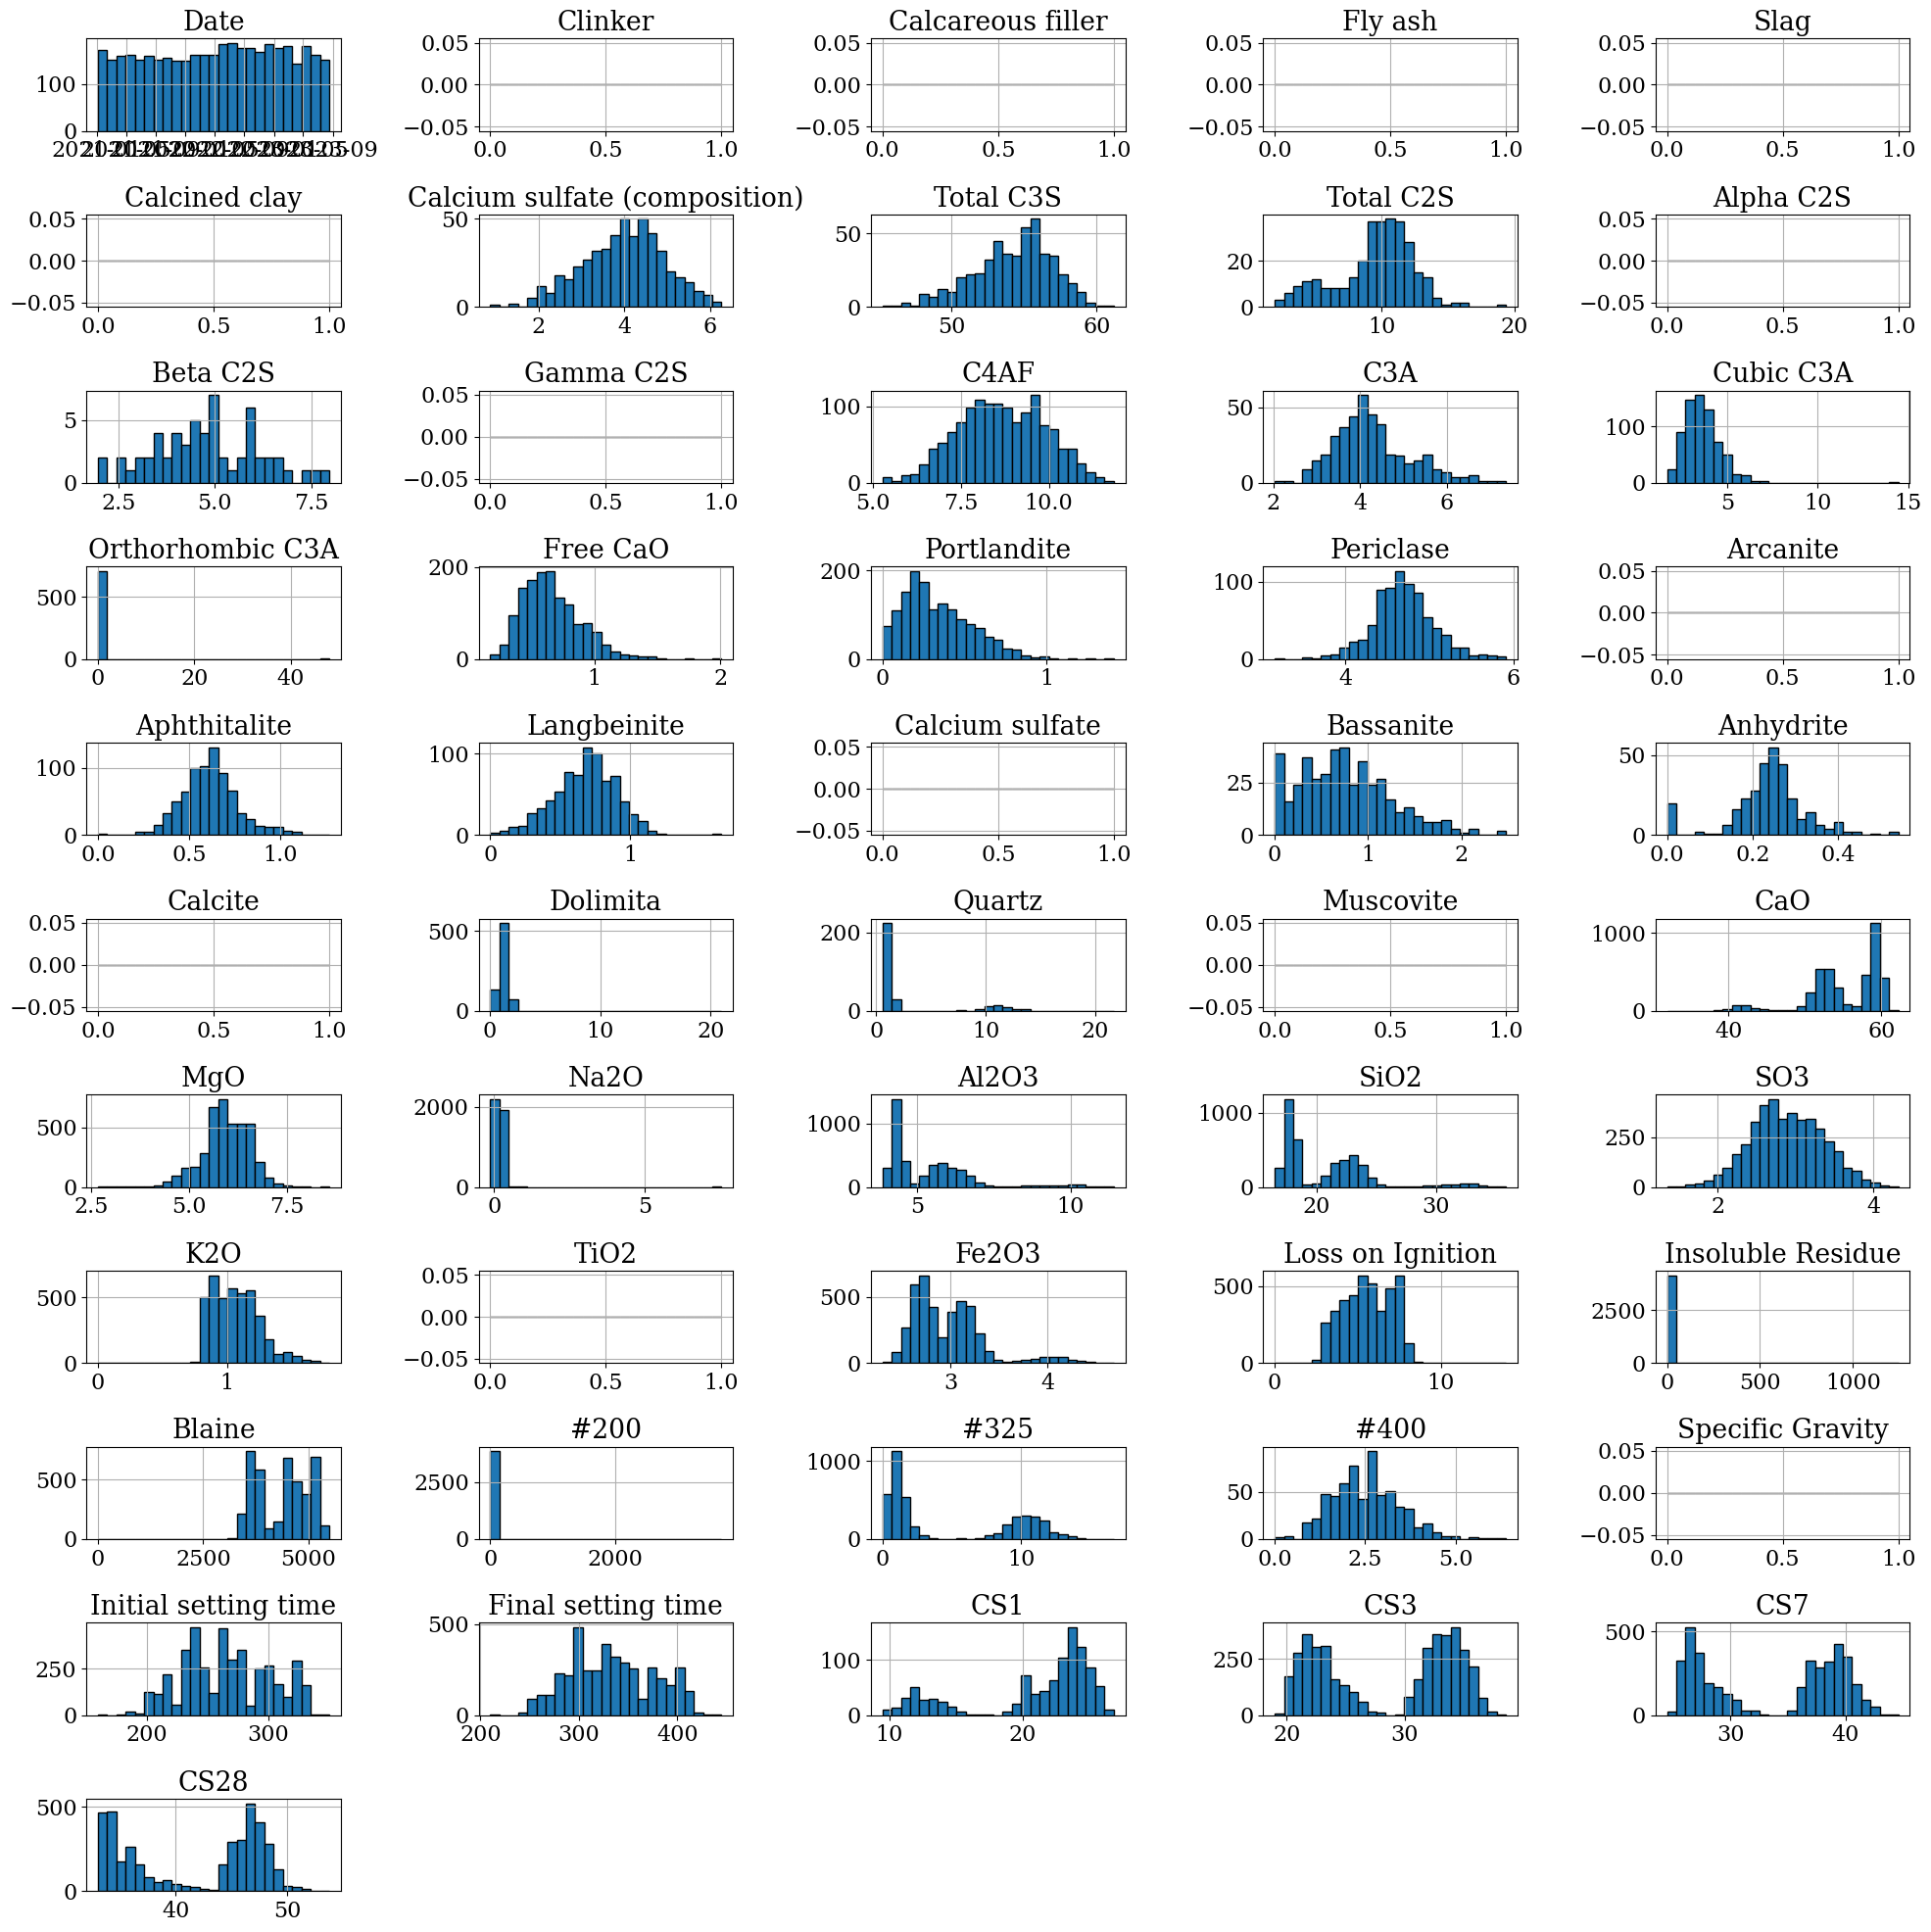

<IPython.core.display.Javascript object>

In [58]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

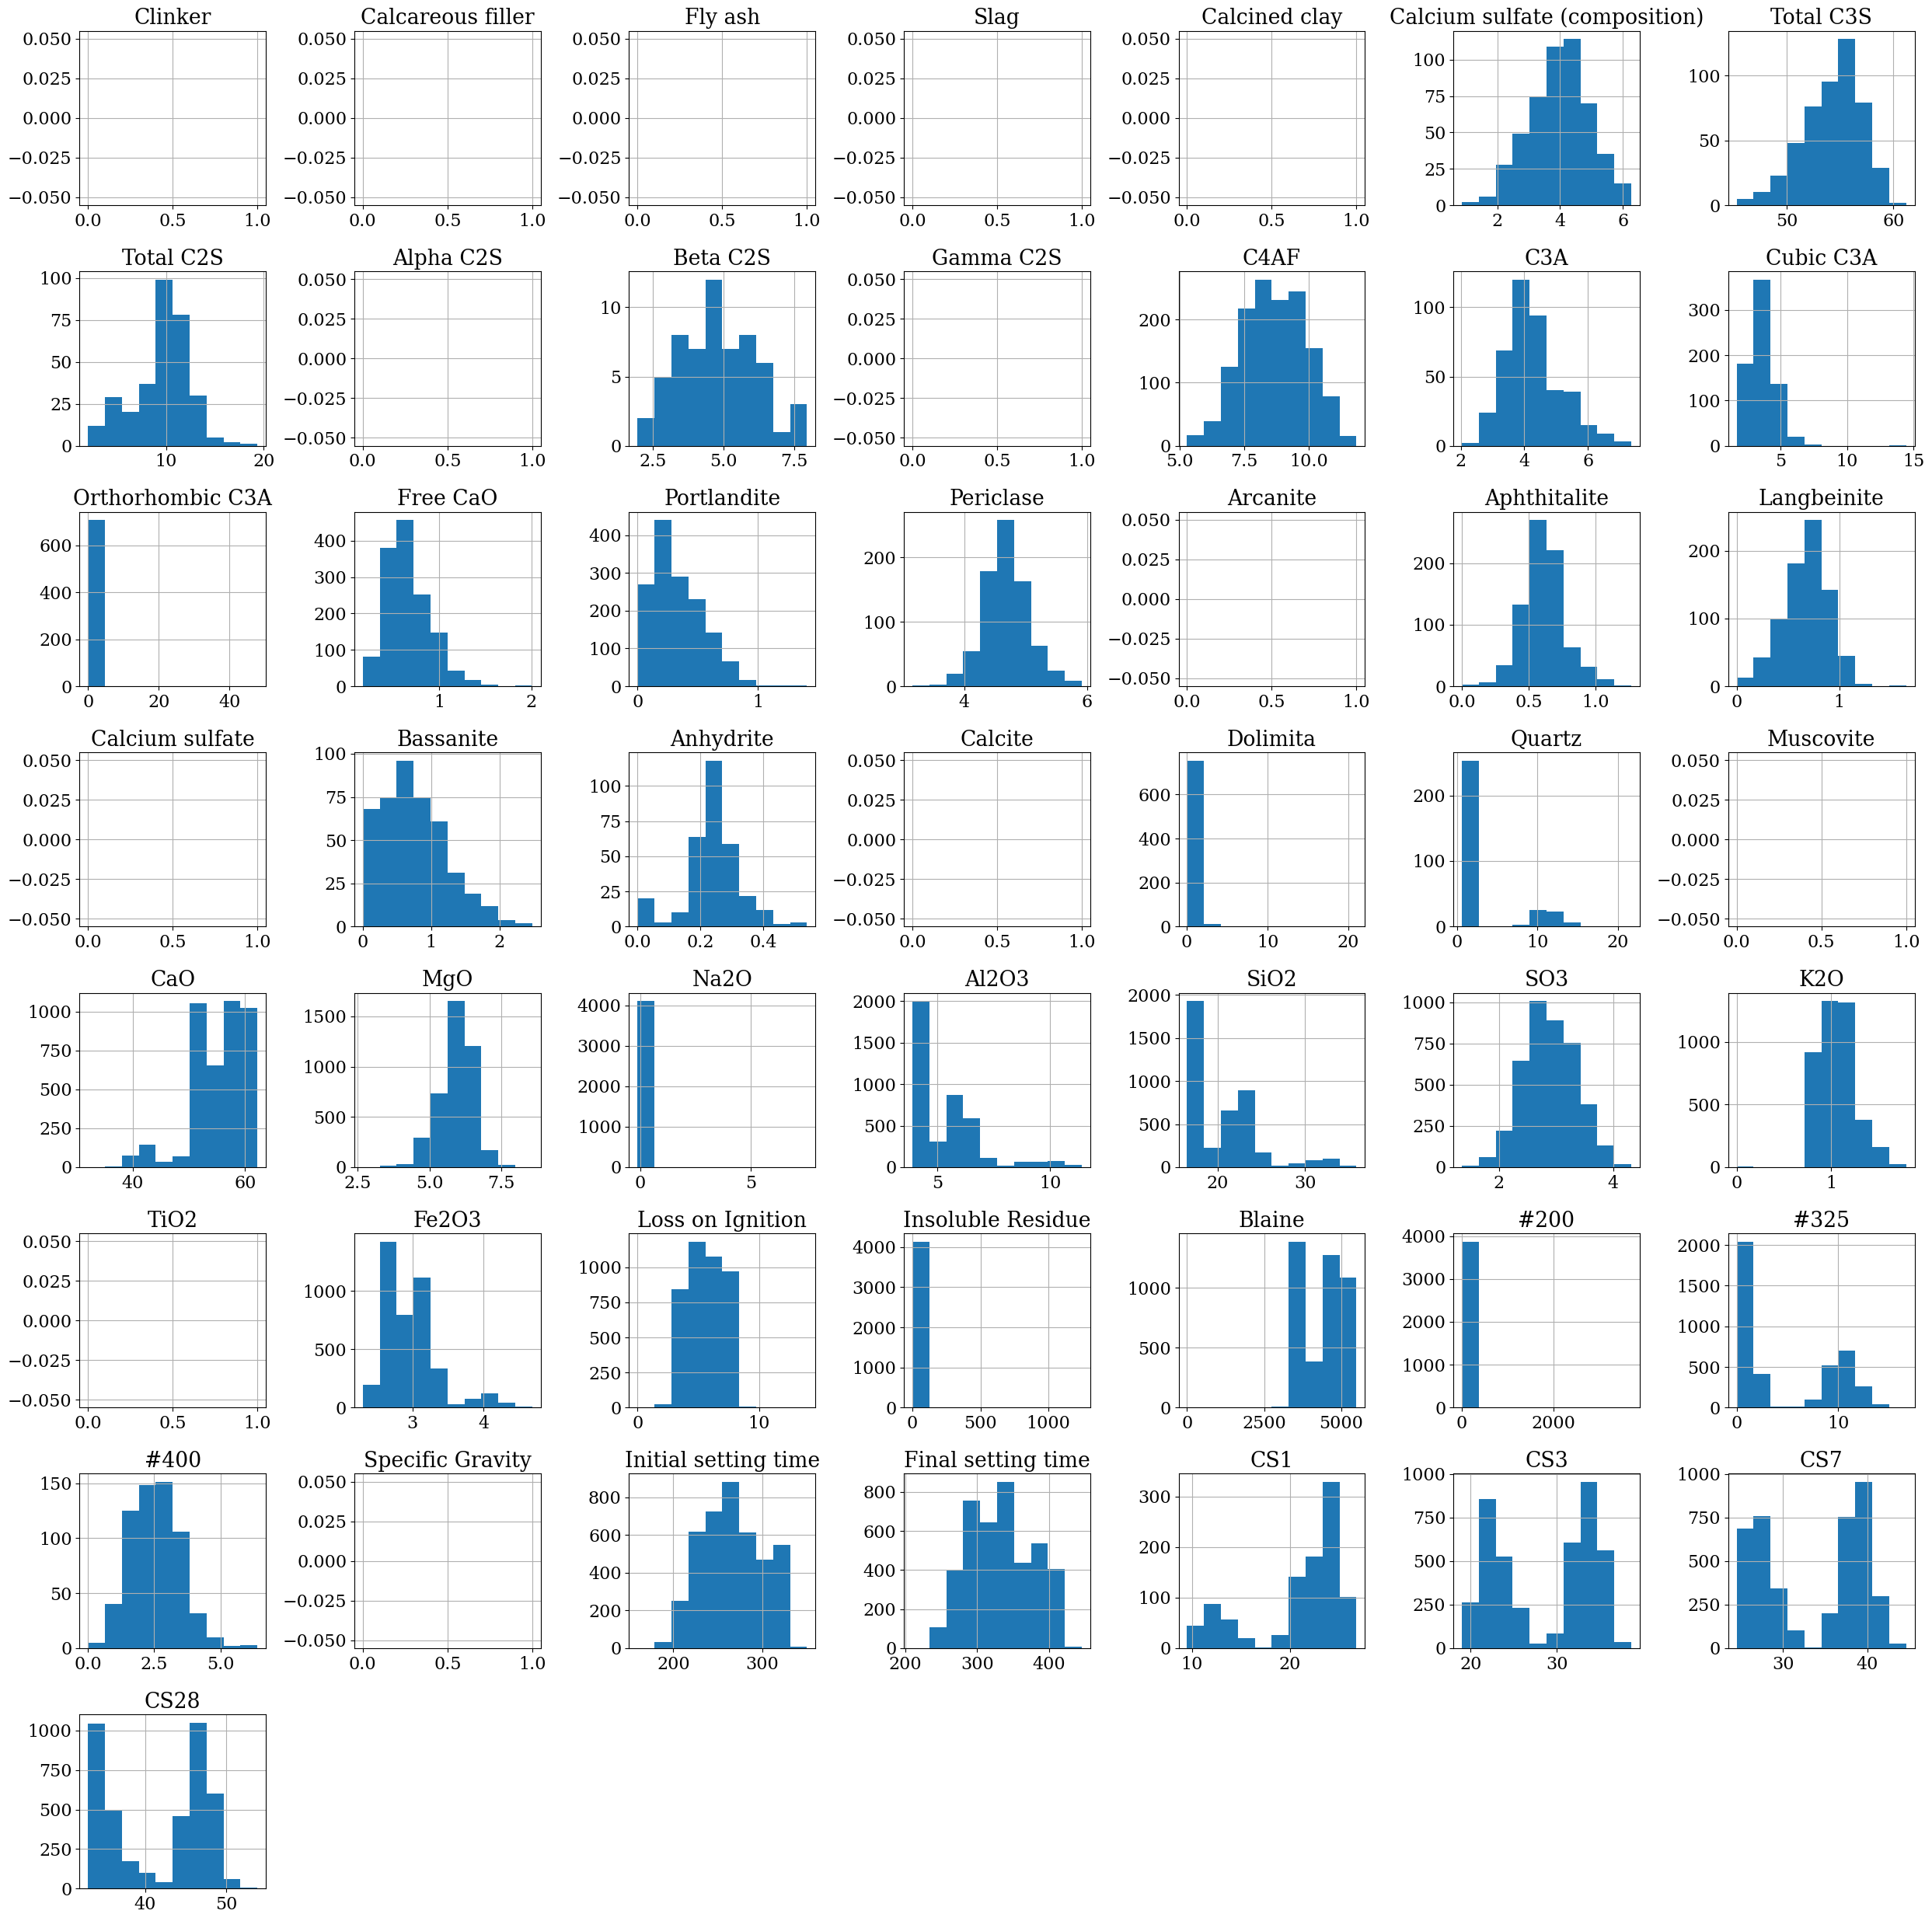

<IPython.core.display.Javascript object>

In [59]:
df.select_dtypes(include="float64").hist(
    figsize=(25, 25),
)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

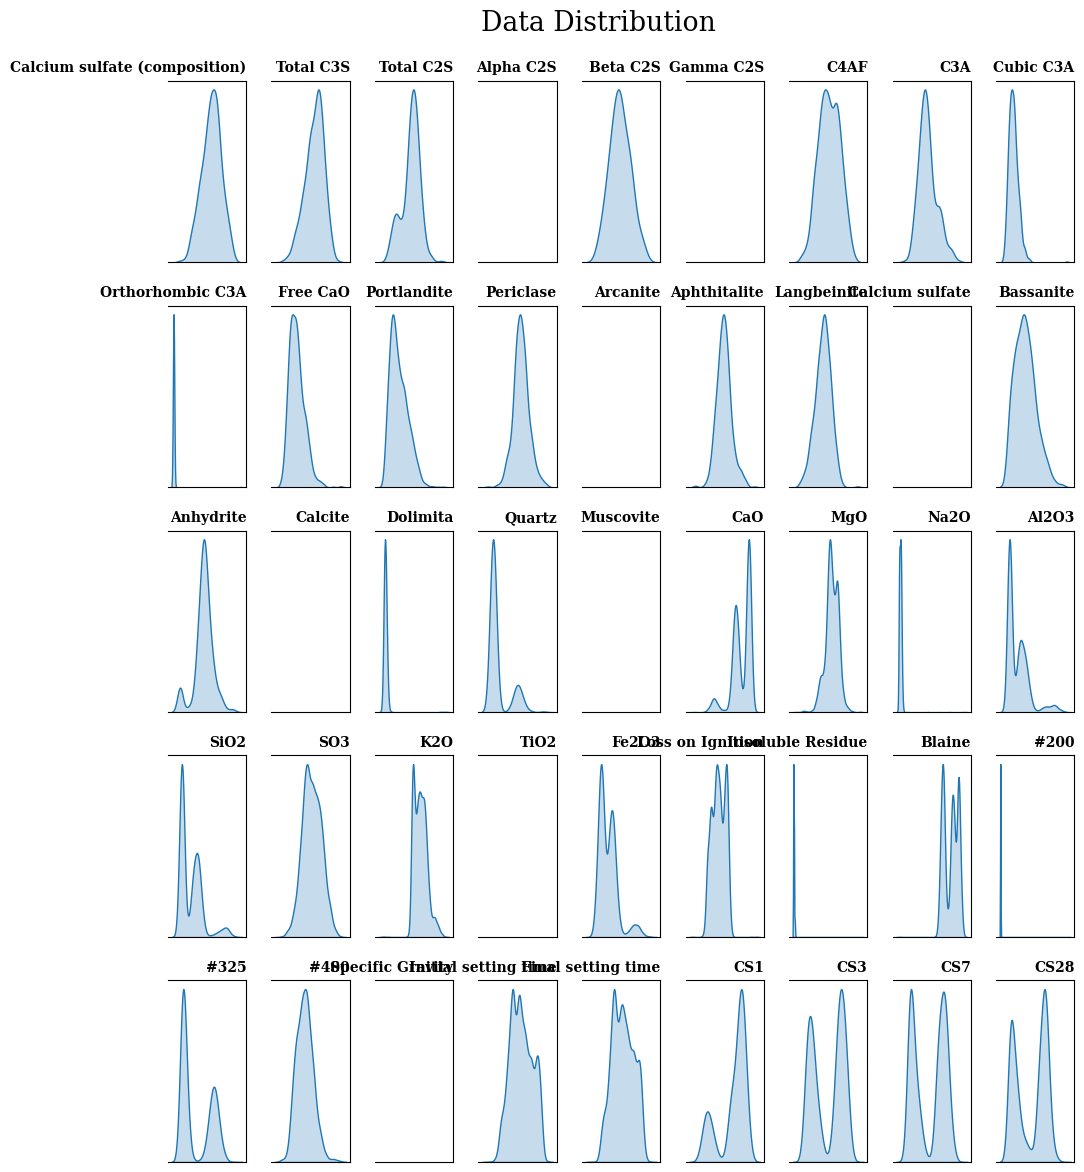

<IPython.core.display.Javascript object>

In [60]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(5, 9, figsize=(10, 12))
axes = axes.flatten()
# sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = (
    df.select_dtypes(include="float64")
    .select_dtypes(exclude=object)
    .drop(["Clinker", "Calcareous filler", "Fly ash", "Slag", "Calcined clay"], axis=1)
    .columns
)

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], fill=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

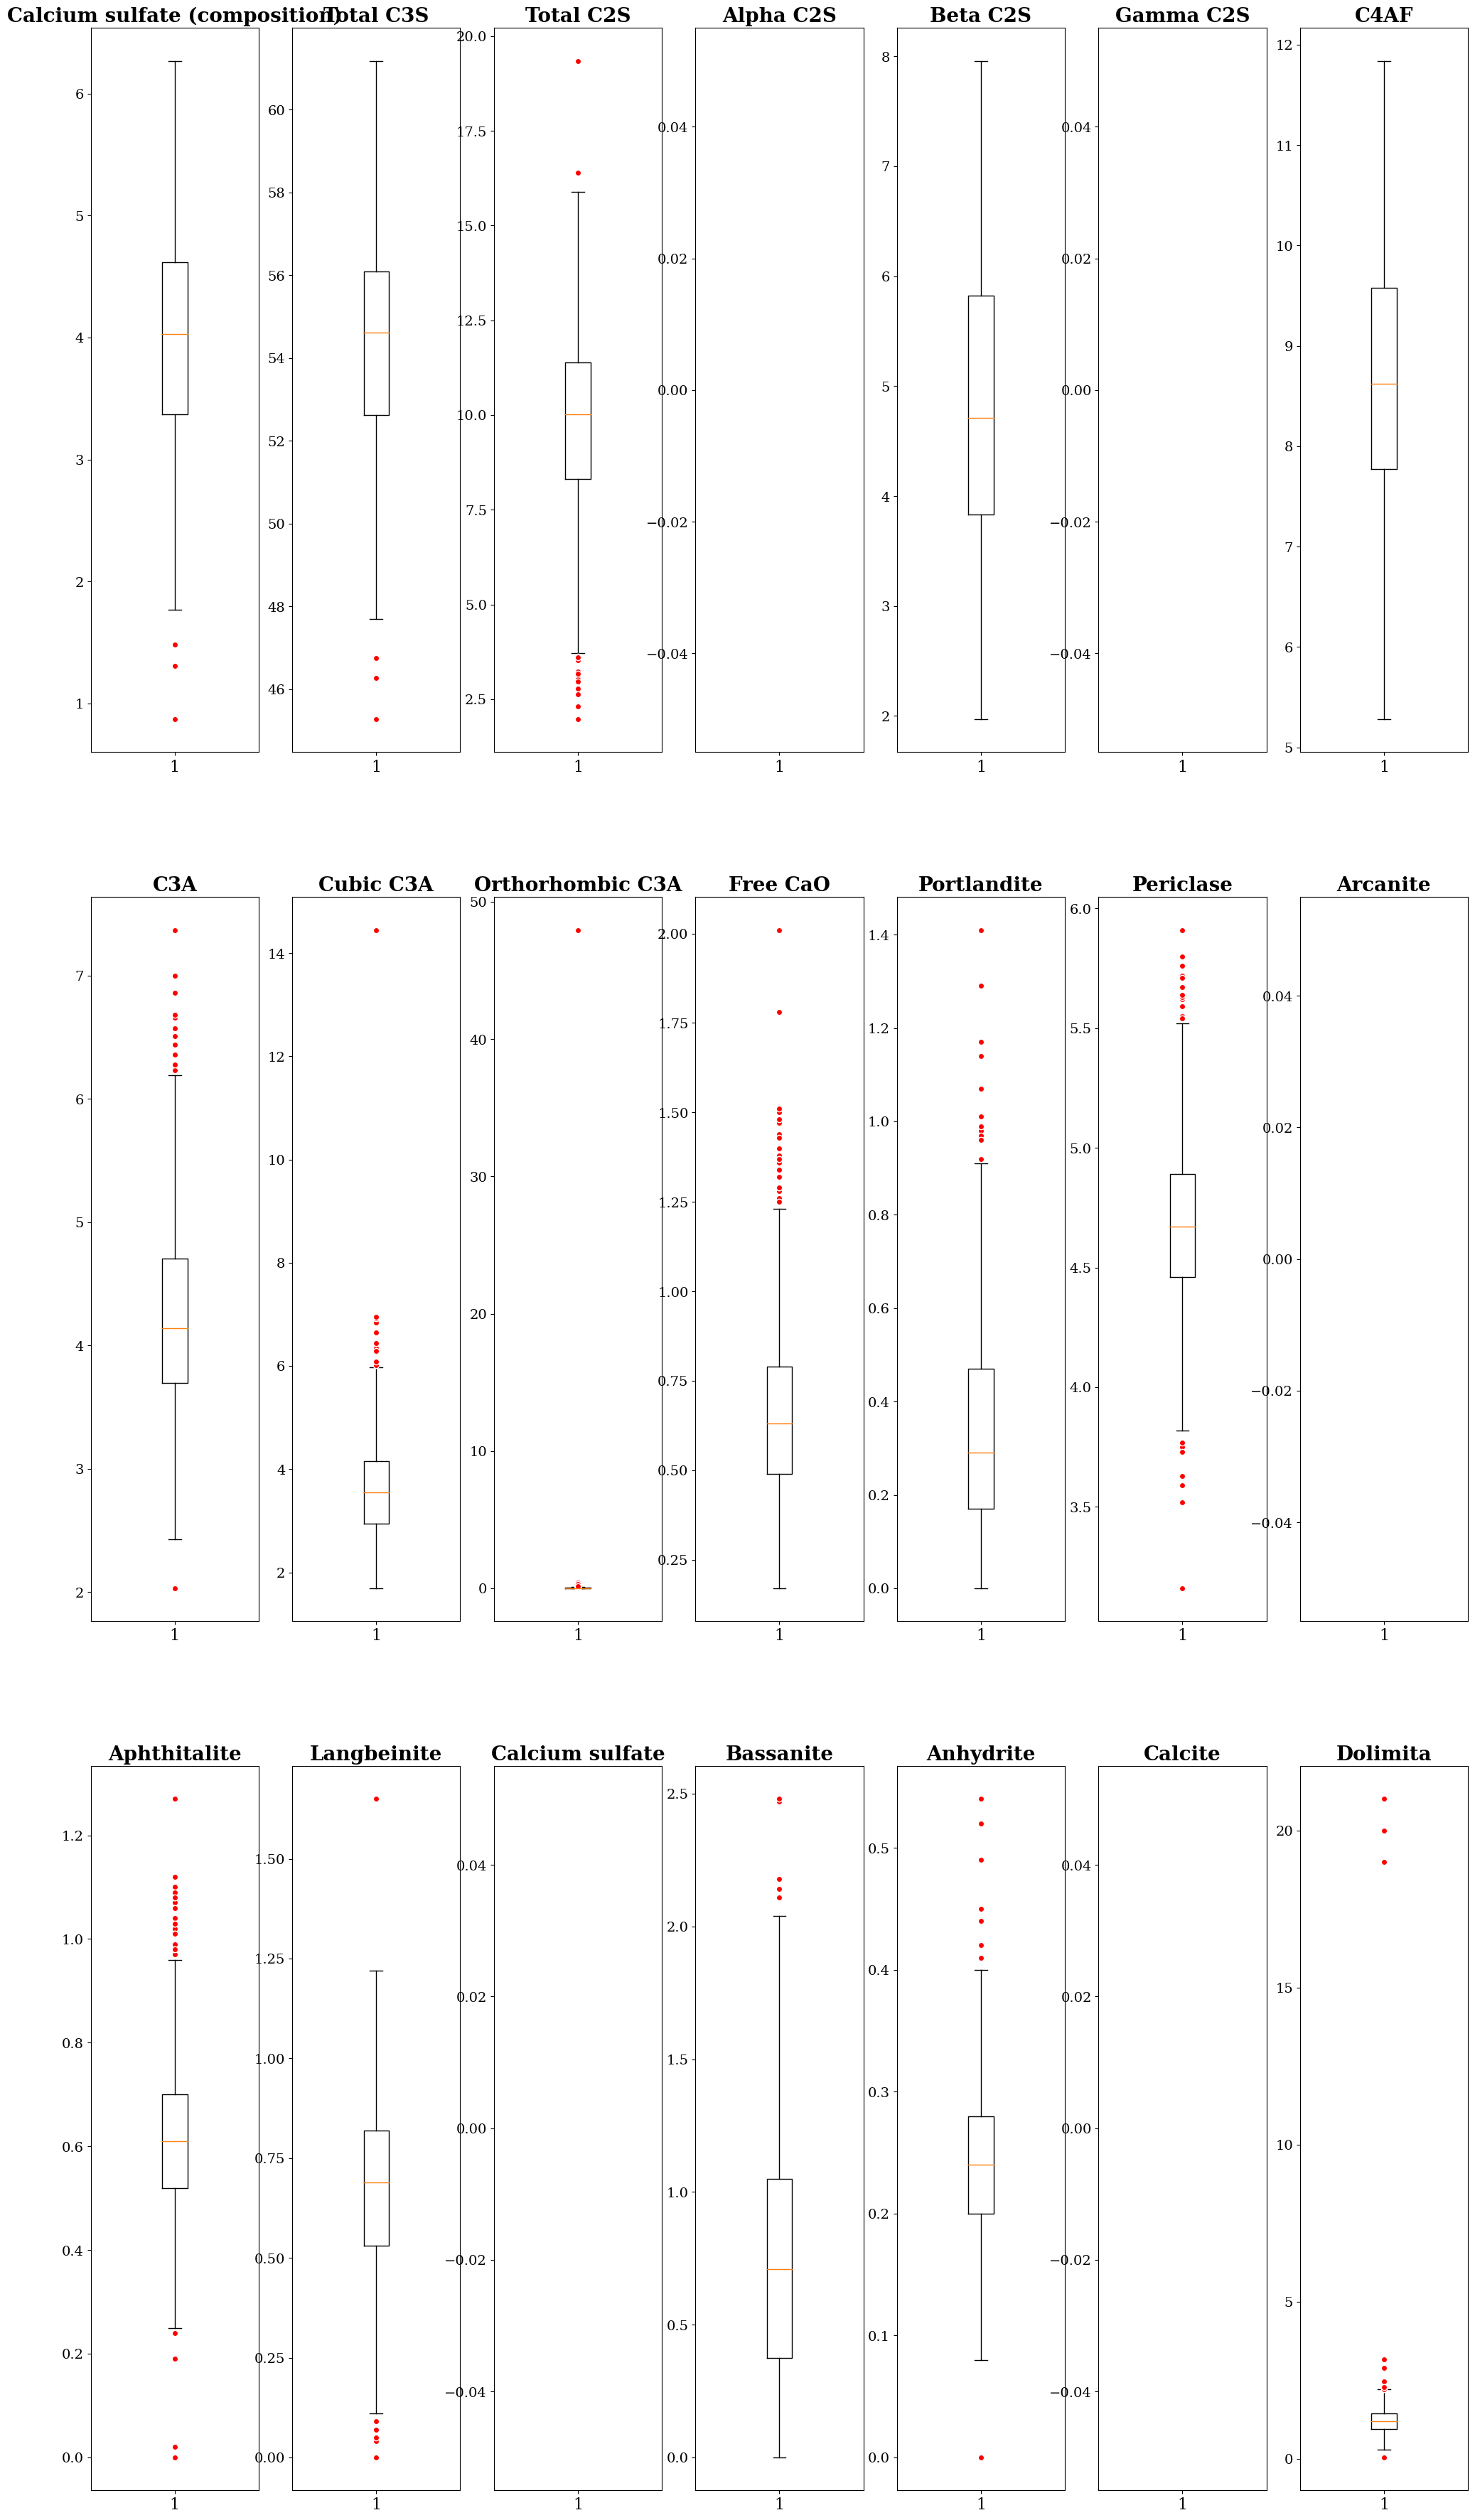

<IPython.core.display.Javascript object>

In [61]:
# Creating subplot of each column with its own scale
float64_columns = (
    df.select_dtypes(include="float64")
    .drop(["Clinker", "Calcareous filler", "Fly ash", "Slag", "Calcined clay"], axis=1)
    .columns
)
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(3, 7, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

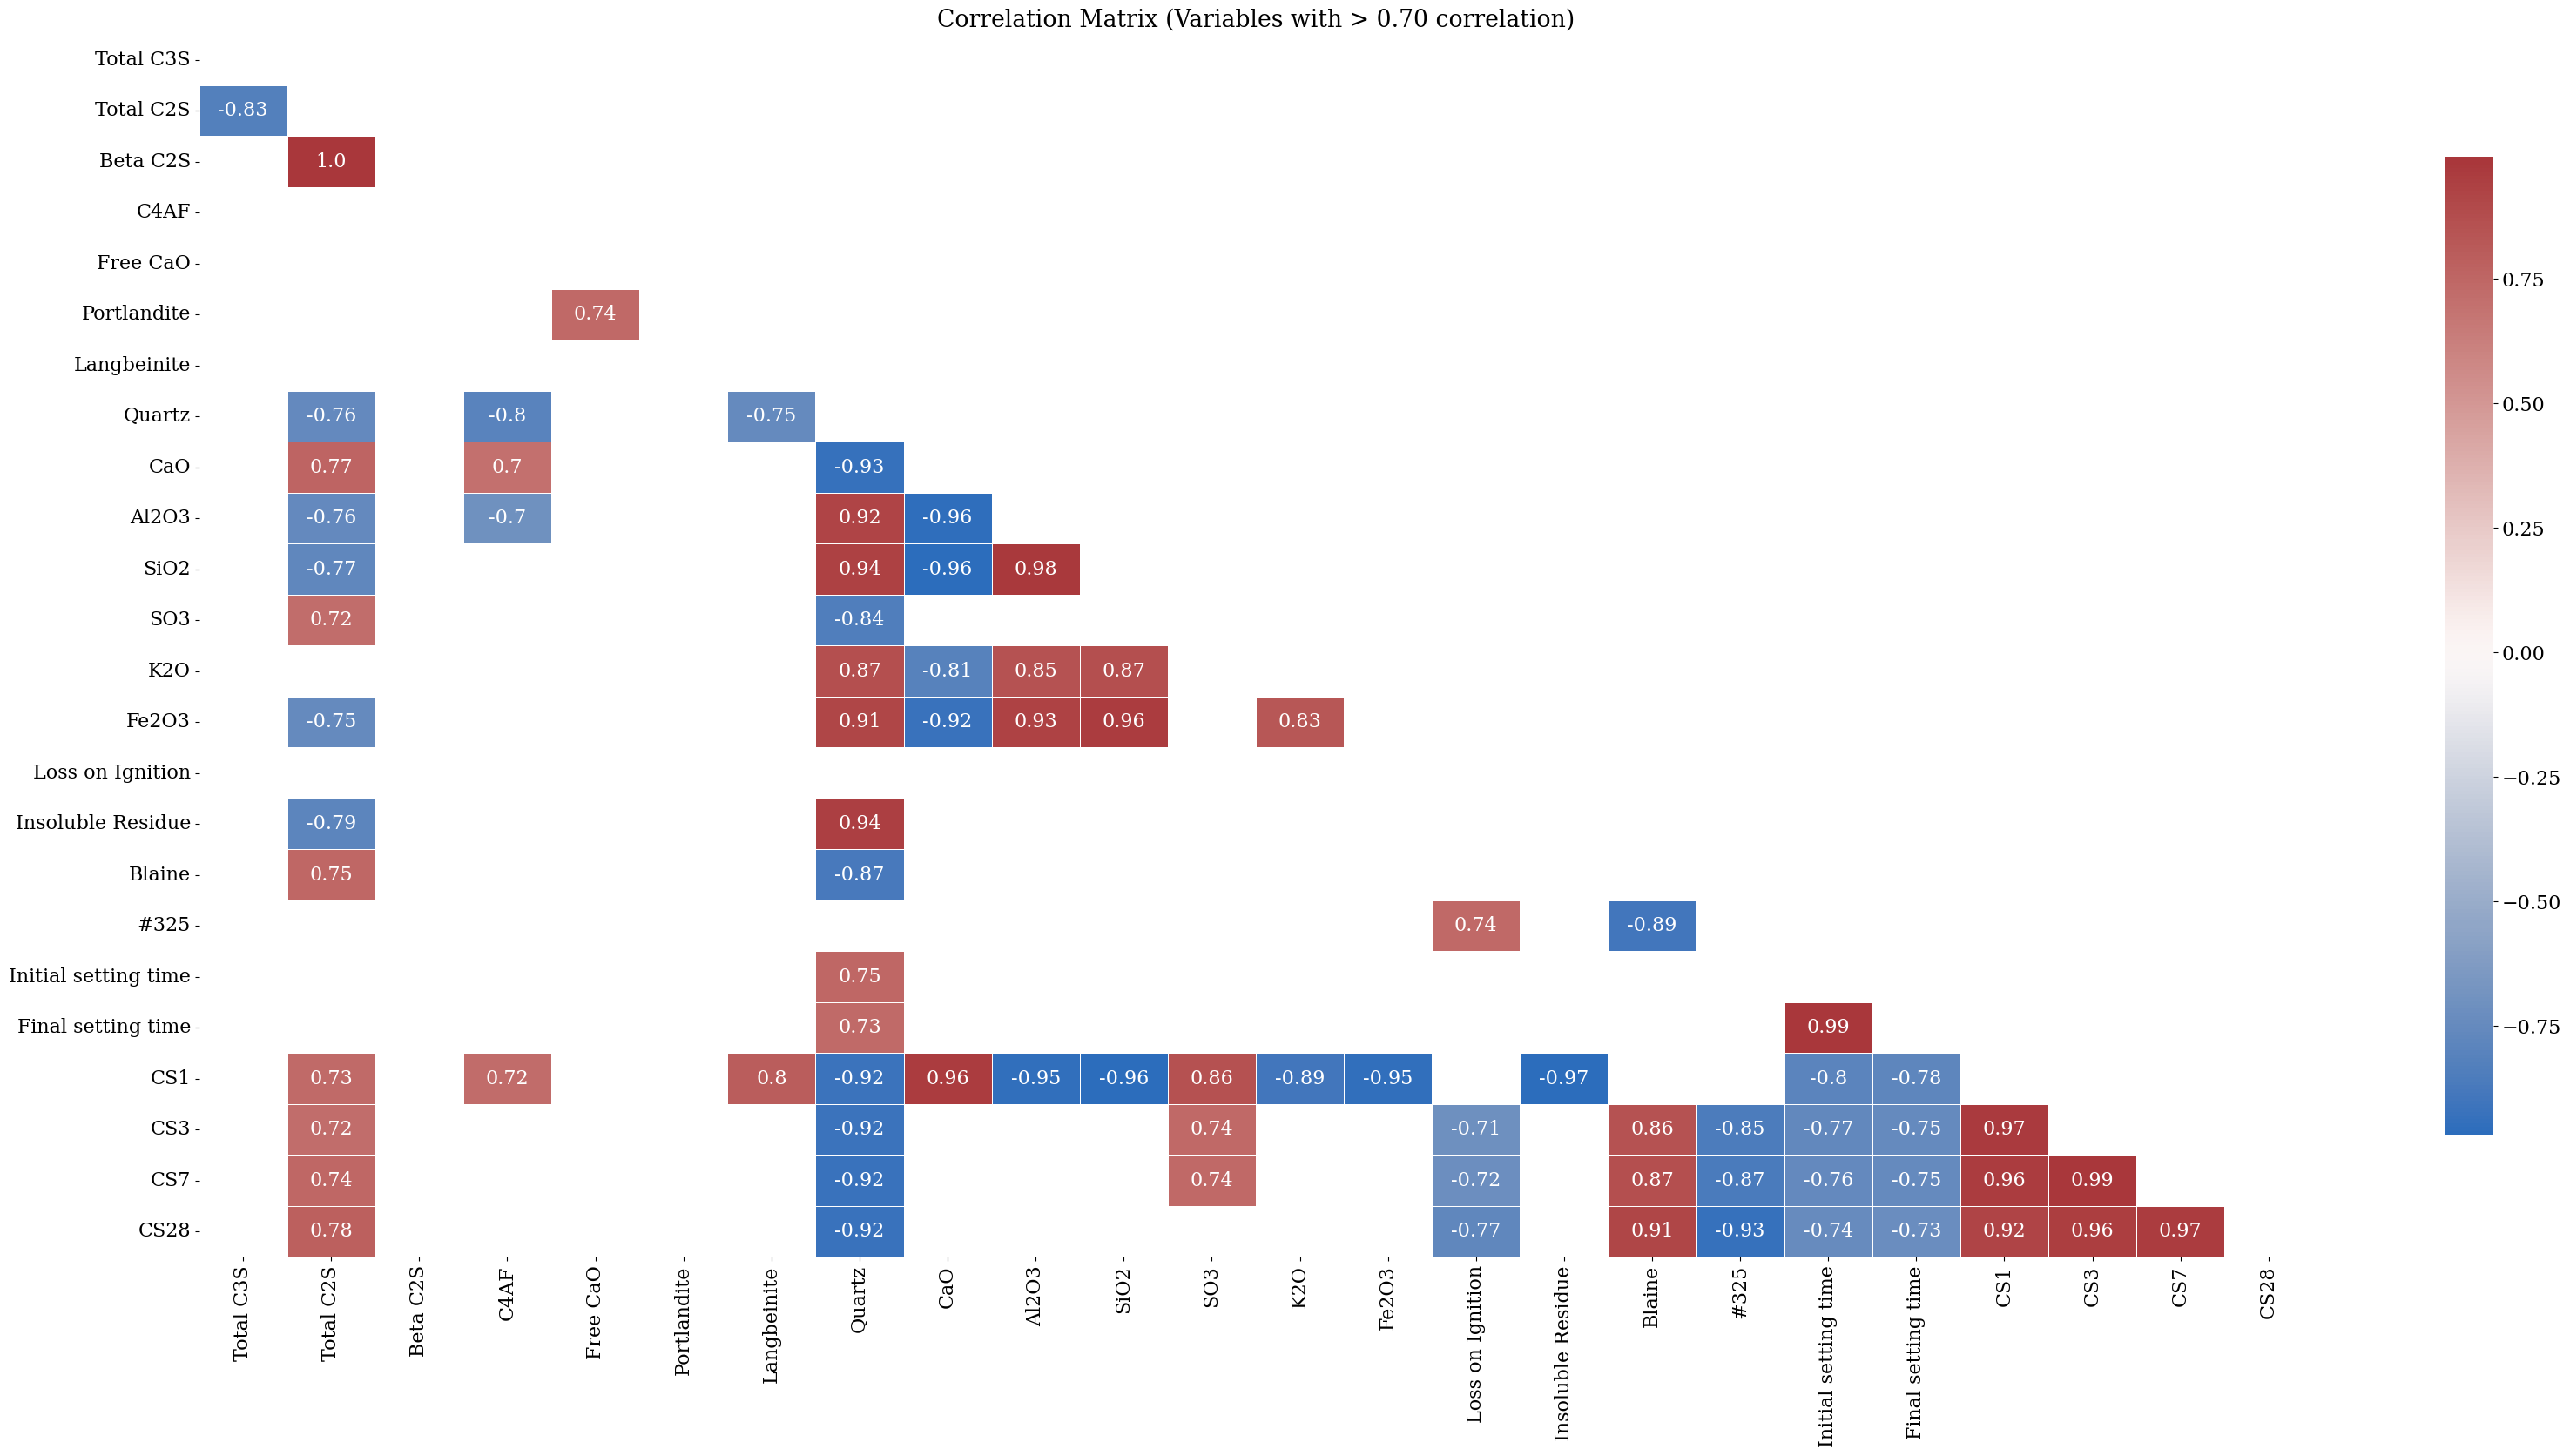

<IPython.core.display.Javascript object>

In [62]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="pearson"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [63]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="pearson")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Total C2S             Beta C2S              0.996048
Initial setting time  Final setting time    0.992774
CS3                   CS7                   0.987733
Al2O3                 SiO2                  0.978506
Insoluble Residue     CS1                   0.968437
                                              ...   
Total C2S             SO3                   0.716807
                      CS3                   0.715712
Loss on Ignition      CS3                   0.710532
C4AF                  Al2O3                 0.704592
                      CaO                   0.704220
Length: 80, dtype: float64

<IPython.core.display.Javascript object>

In [64]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                            CS28    0.965338
CS3                            CS28    0.955245
#325                           CS28    0.930448
Quartz                         CS28    0.923611
CS1                            CS28    0.919425
Blaine                         CS28    0.913358
Total C2S                      CS28    0.784208
Loss on Ignition               CS28    0.774726
Initial setting time           CS28    0.744931
Final setting time             CS28    0.728678
SO3                            CS28    0.679401
C4AF                           CS28    0.653495
Calcium sulfate (composition)  CS28    0.548039
Portlandite                    CS28    0.542633
CaO                            CS28    0.461668
SiO2                           CS28    0.451443
Free CaO                       CS28    0.446995
Fe2O3                          CS28    0.404467
Al2O3                          CS28    0.396199
K2O                            CS28    0.396080
Langbeinite                    CS28    0

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

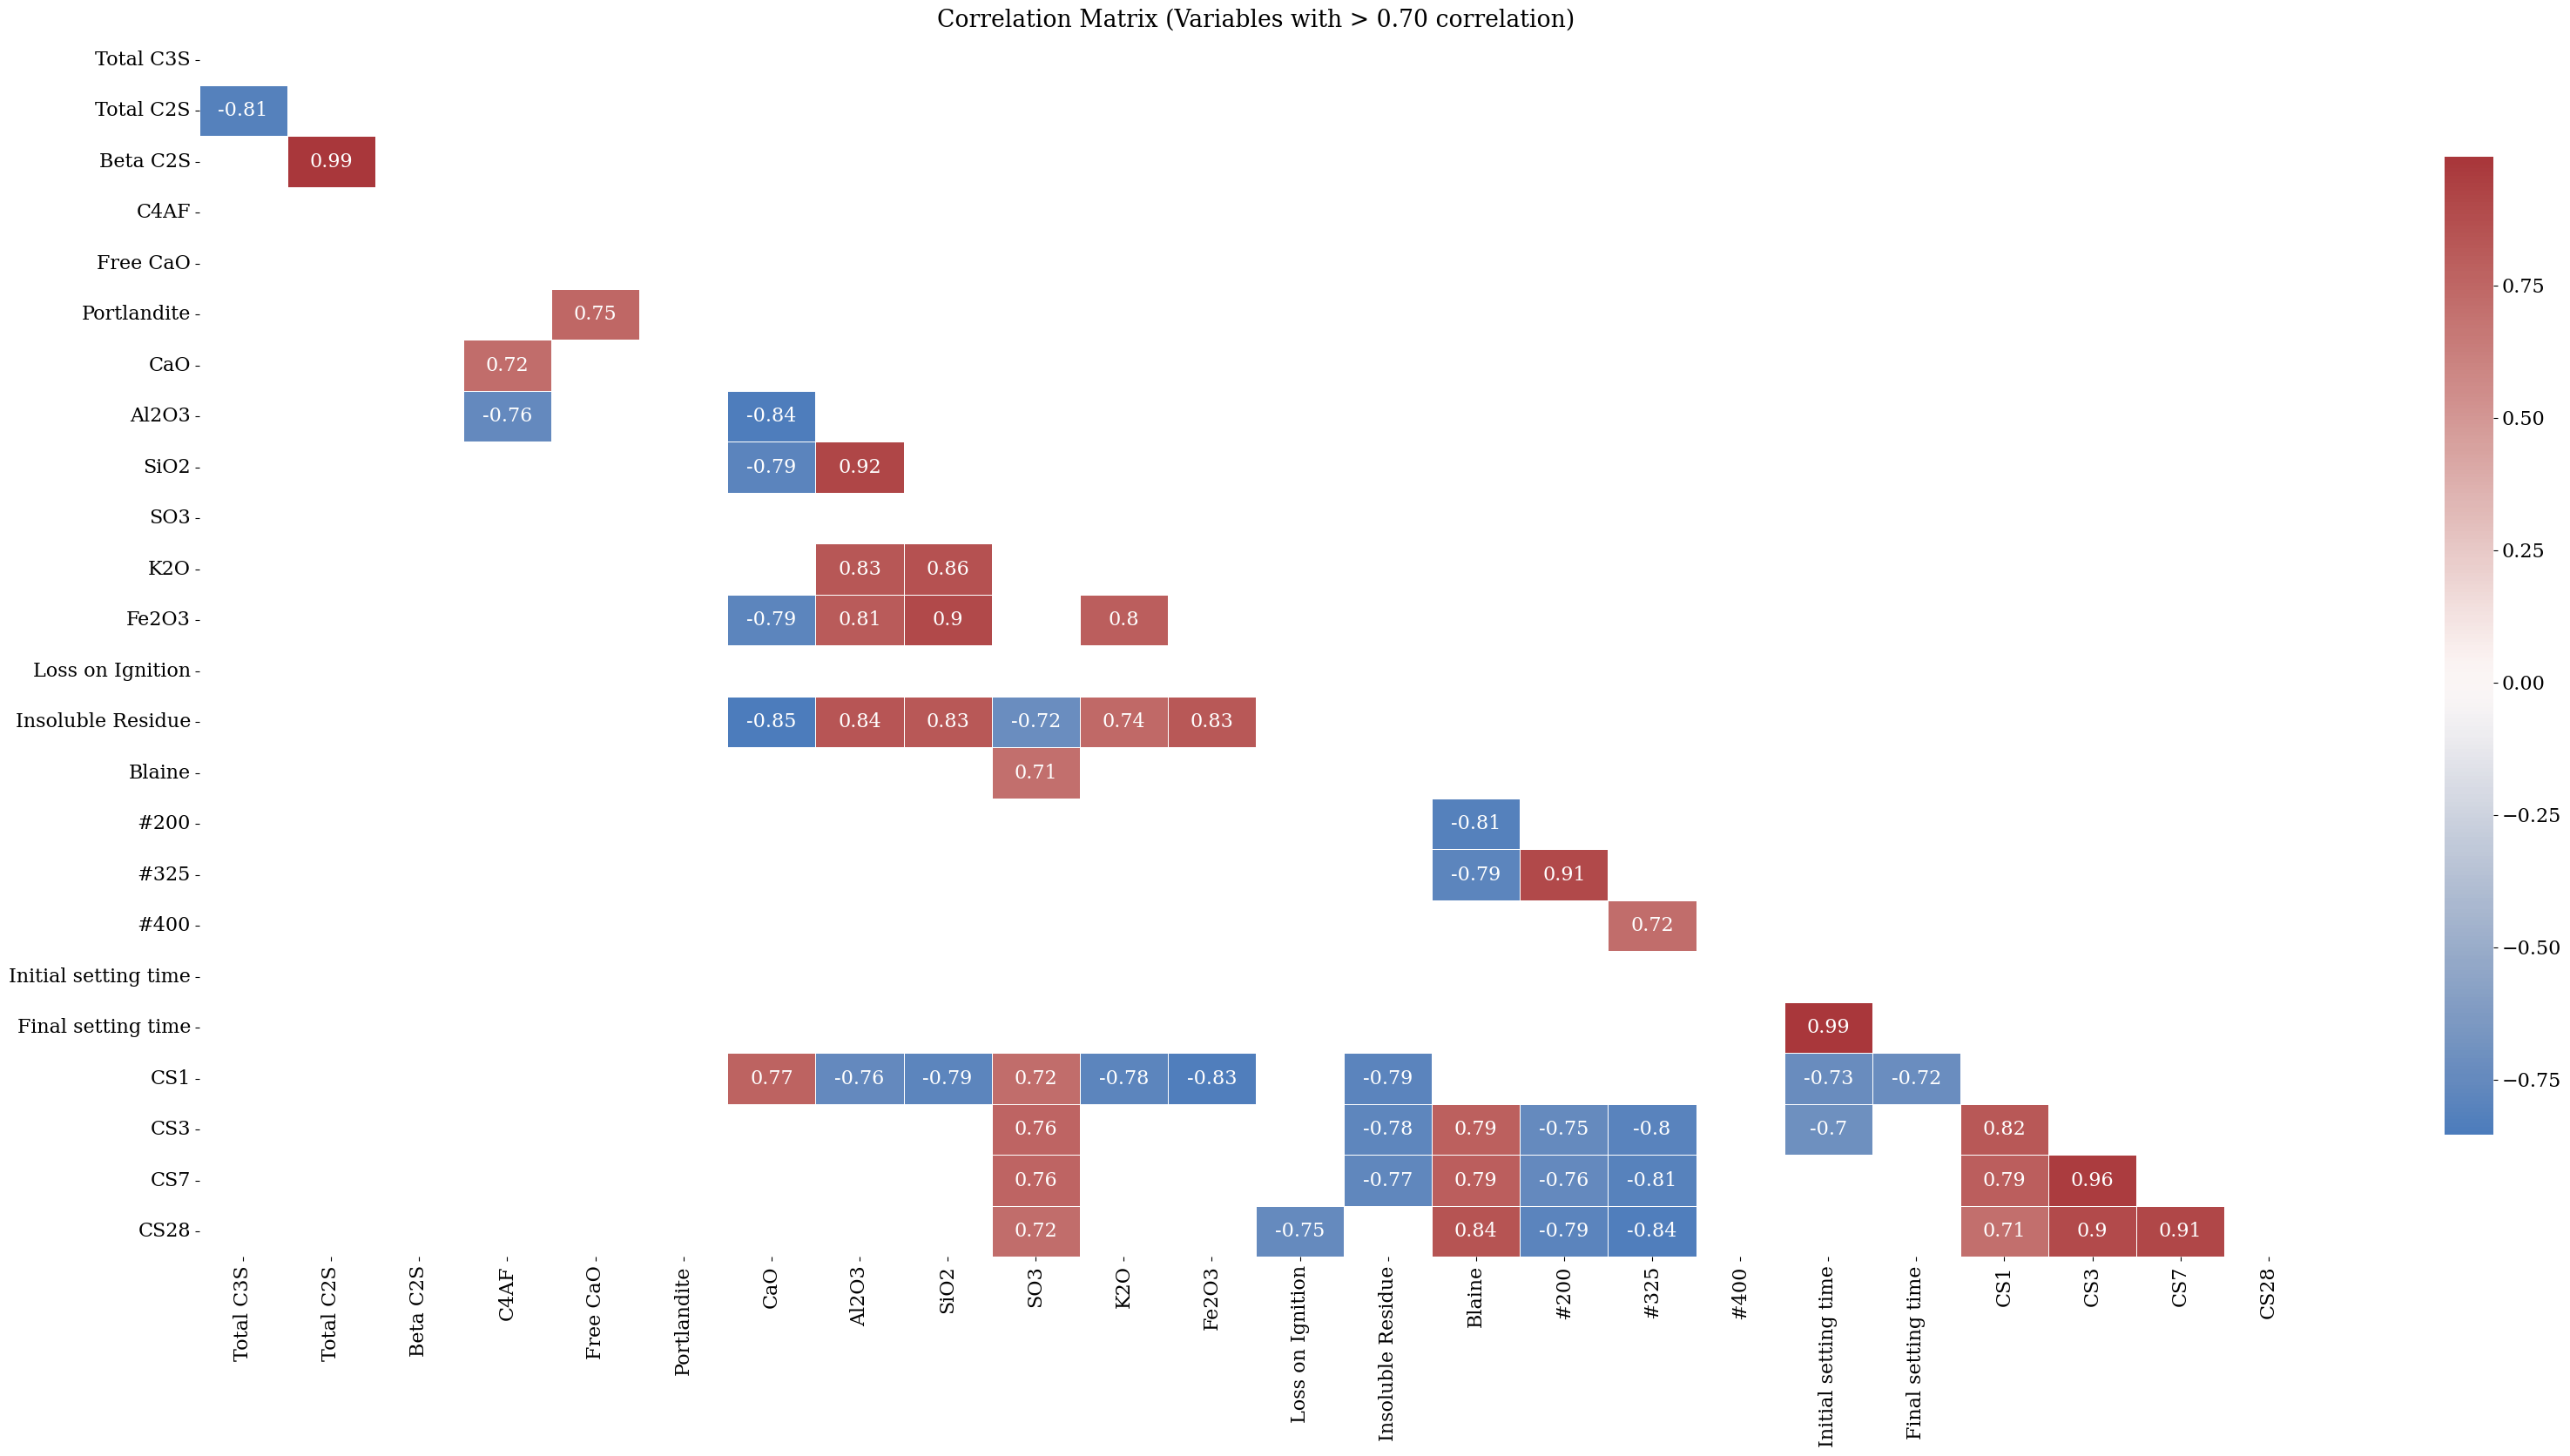

<IPython.core.display.Javascript object>

In [65]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="spearman"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [66]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="spearman")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Total C2S             Beta C2S              0.993936
Initial setting time  Final setting time    0.992876
CS3                   CS7                   0.959139
Al2O3                 SiO2                  0.917166
CS7                   CS28                  0.912359
#200                  #325                  0.907130
SiO2                  Fe2O3                 0.904561
CS3                   CS28                  0.895621
SiO2                  K2O                   0.863306
CaO                   Insoluble Residue     0.854480
                      Al2O3                 0.844277
Blaine                CS28                  0.843184
#325                  CS28                  0.837615
Al2O3                 Insoluble Residue     0.835976
Fe2O3                 CS1                   0.834493
Al2O3                 K2O                   0.831047
Fe2O3                 Insoluble Residue     0.826613
SiO2                  Insoluble Residue     0.826458
CS1                   CS3                   0.

<IPython.core.display.Javascript object>

In [67]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                            CS28    0.912359
CS3                            CS28    0.895621
Blaine                         CS28    0.843184
#325                           CS28    0.837615
#200                           CS28    0.794482
Loss on Ignition               CS28    0.746392
SO3                            CS28    0.715348
CS1                            CS28    0.707031
Initial setting time           CS28    0.680415
Insoluble Residue              CS28    0.671928
Final setting time             CS28    0.663655
Quartz                         CS28    0.582232
Total C2S                      CS28    0.564636
Portlandite                    CS28    0.551207
C4AF                           CS28    0.538260
SiO2                           CS28    0.531150
Fe2O3                          CS28    0.519903
CaO                            CS28    0.510082
Al2O3                          CS28    0.502889
Dolimita                       CS28    0.450876
K2O                            CS28    0

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

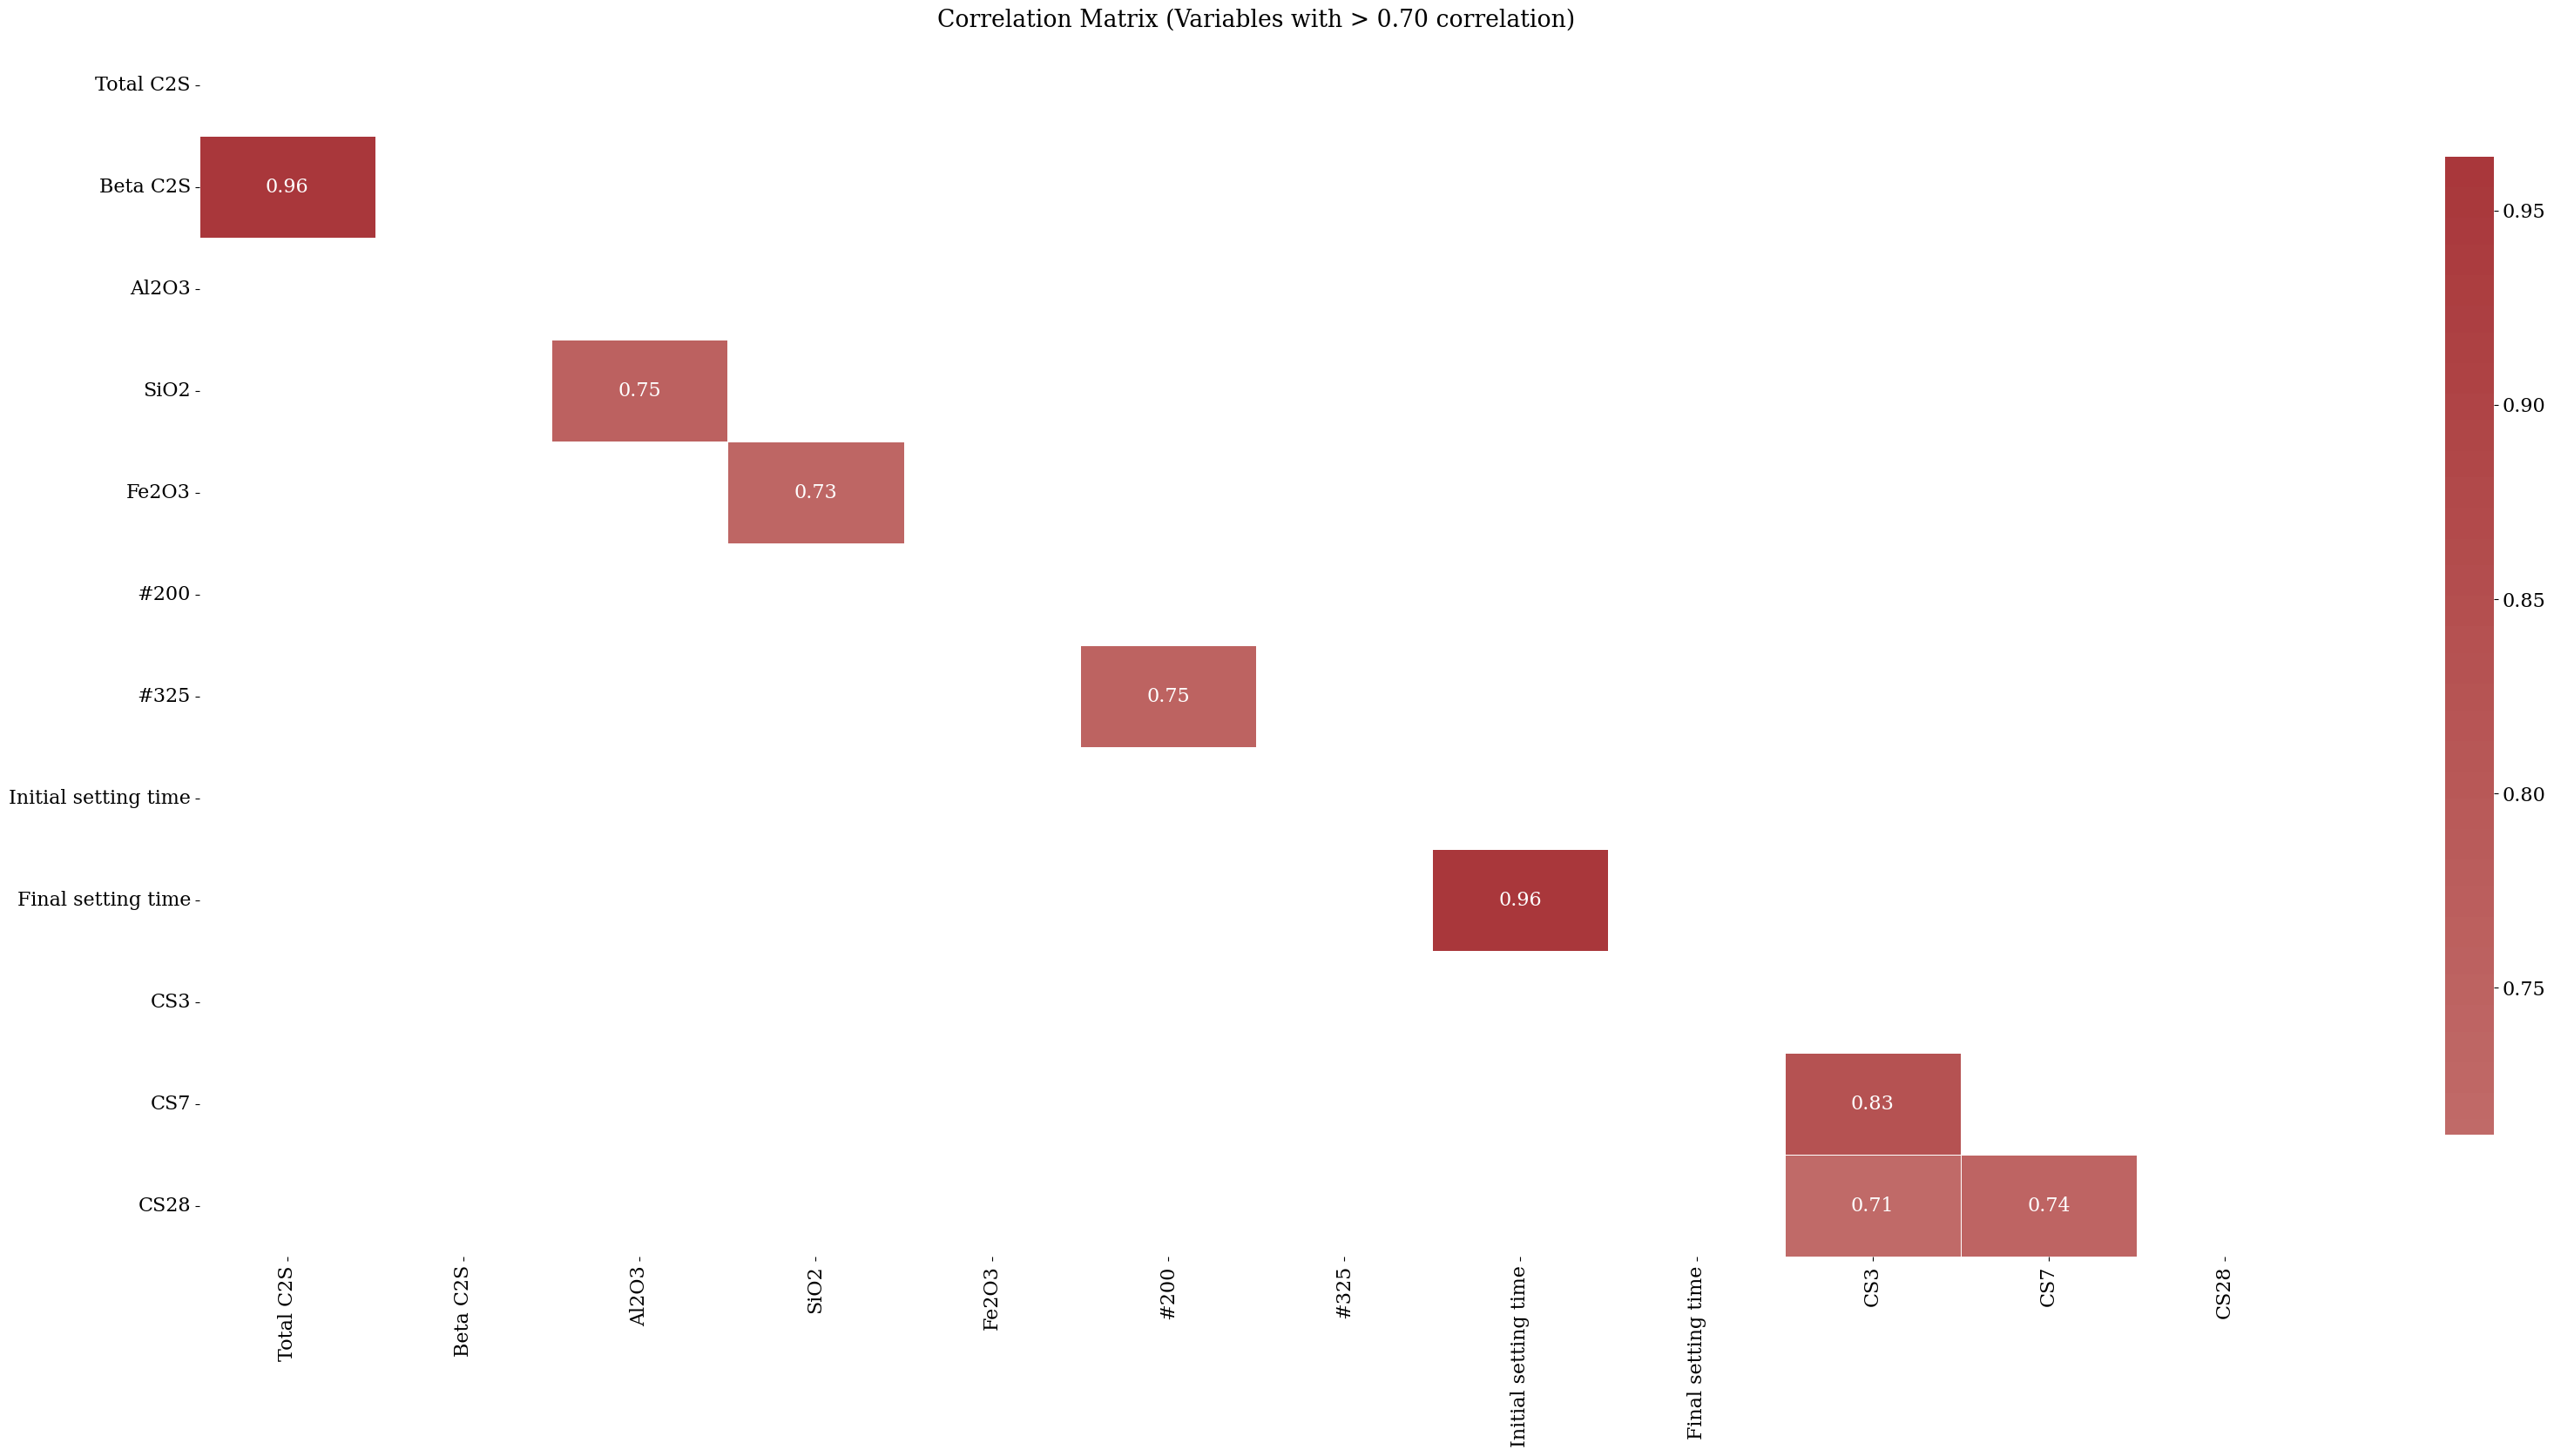

<IPython.core.display.Javascript object>

In [68]:
df_corr = df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1).corr(
    method="kendall"
)


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [69]:
corr_matrix = (
    df.drop(["Plant", "Date", "City", "Cement_Type"], axis=1)
    .corr(method="kendall")
    .abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Initial setting time  Final setting time    0.963888
Total C2S             Beta C2S              0.962833
CS3                   CS7                   0.828988
Al2O3                 SiO2                  0.754999
#200                  #325                  0.747224
CS7                   CS28                  0.740747
SiO2                  Fe2O3                 0.732907
CS3                   CS28                  0.712227
dtype: float64

<IPython.core.display.Javascript object>

In [70]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                            CS28    0.740747
CS3                            CS28    0.712227
Blaine                         CS28    0.626958
#325                           CS28    0.624861
#200                           CS28    0.567650
Loss on Ignition               CS28    0.539464
CS1                            CS28    0.529014
SO3                            CS28    0.509143
Insoluble Residue              CS28    0.466026
Initial setting time           CS28    0.463478
Final setting time             CS28    0.445738
Quartz                         CS28    0.424756
Total C2S                      CS28    0.400202
Portlandite                    CS28    0.376364
Fe2O3                          CS28    0.345755
C4AF                           CS28    0.344318
SiO2                           CS28    0.343591
CaO                            CS28    0.323578
Orthorhombic C3A               CS28    0.323086
Al2O3                          CS28    0.318937
Dolimita                       CS28    0

<IPython.core.display.Javascript object>

#### Bivariate Analysis

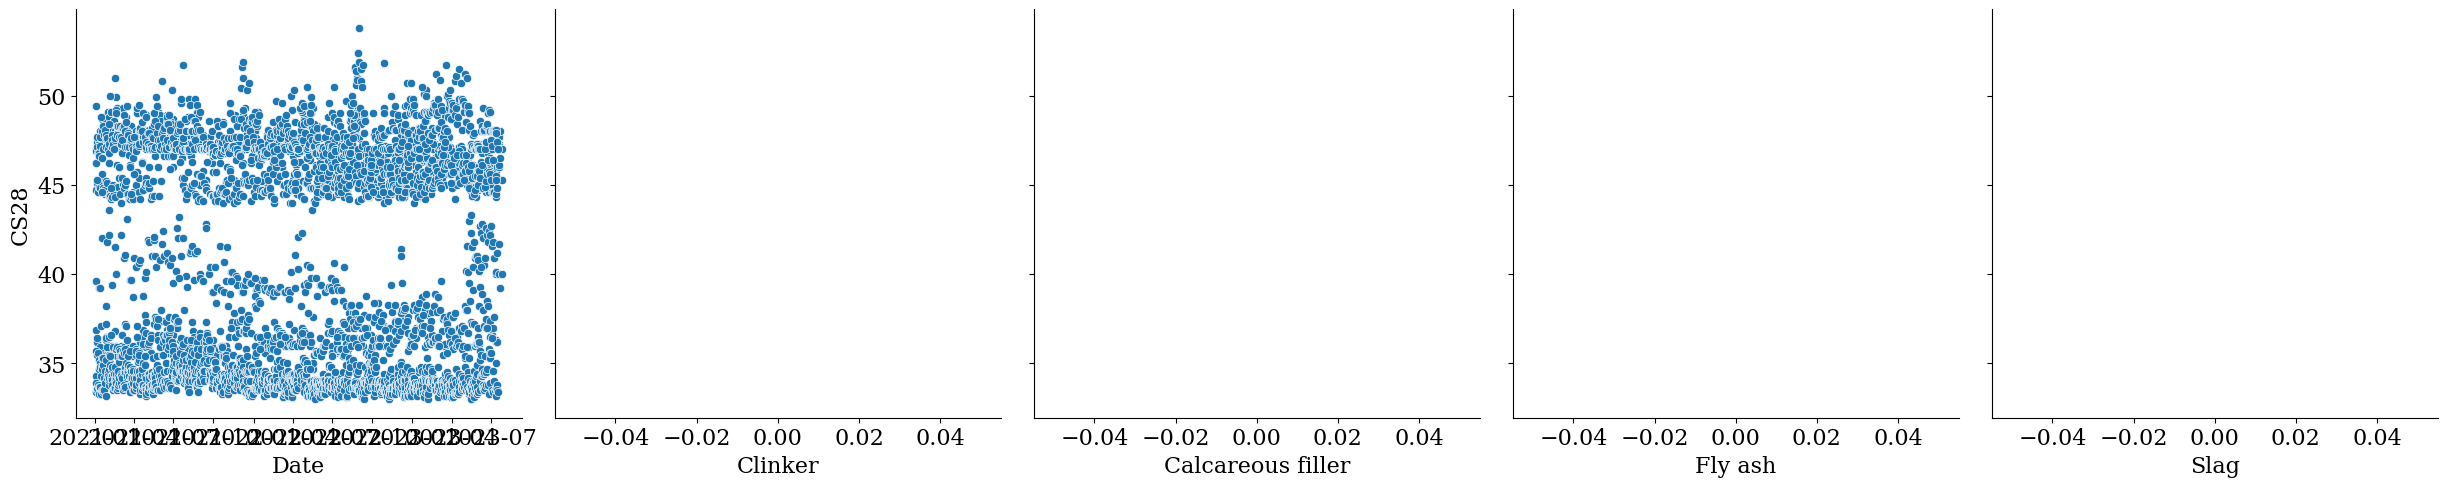

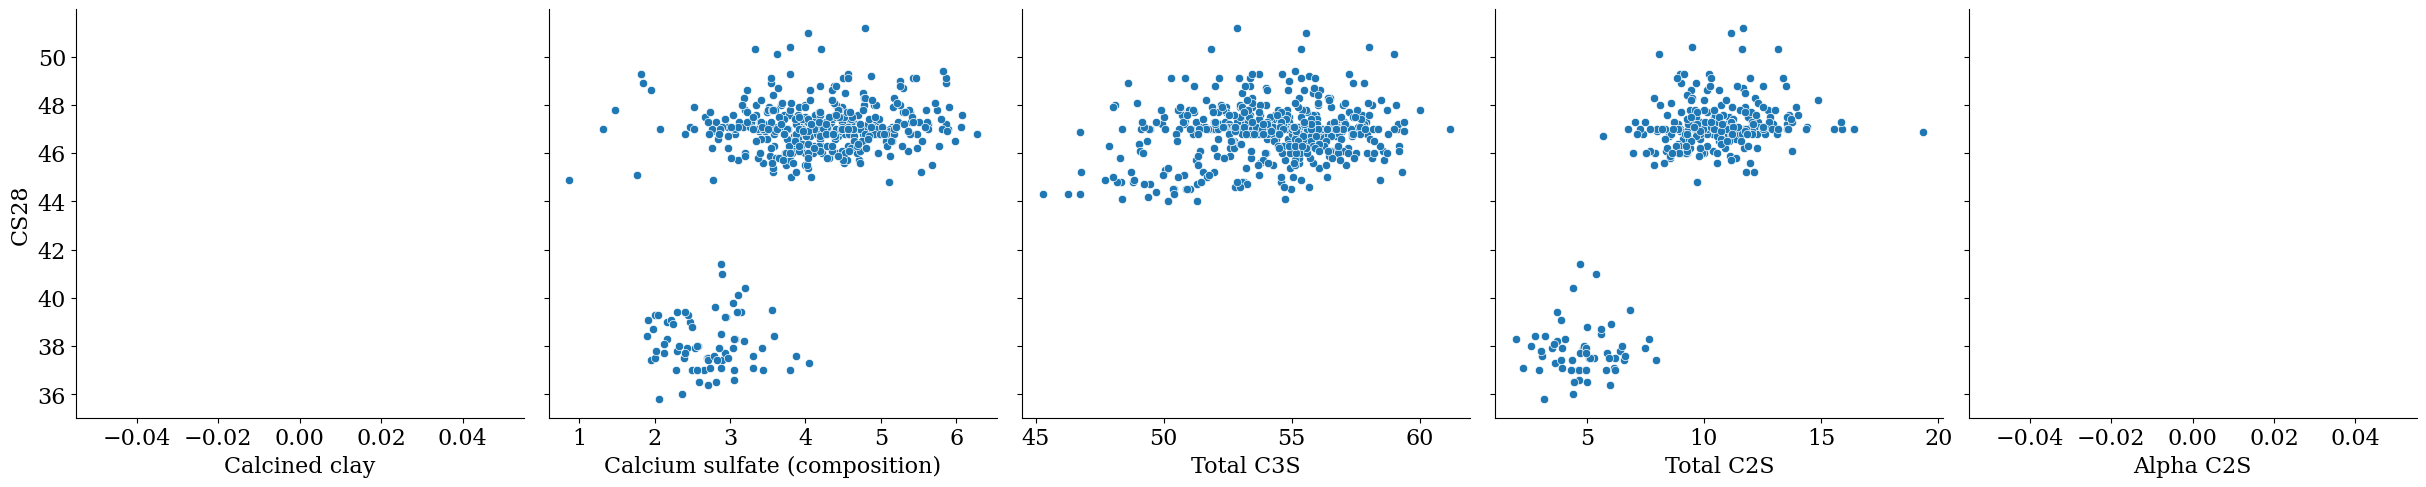

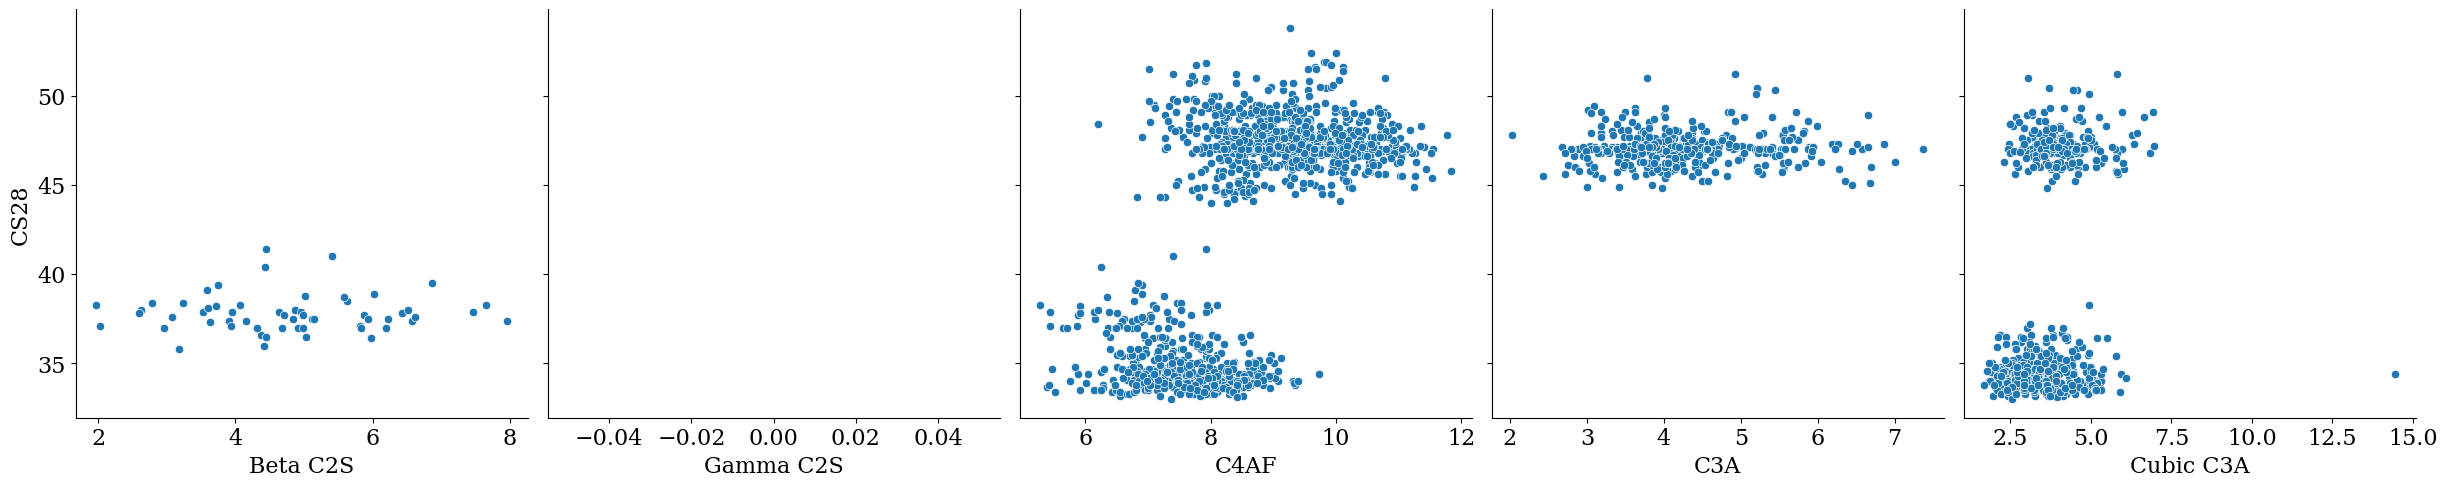

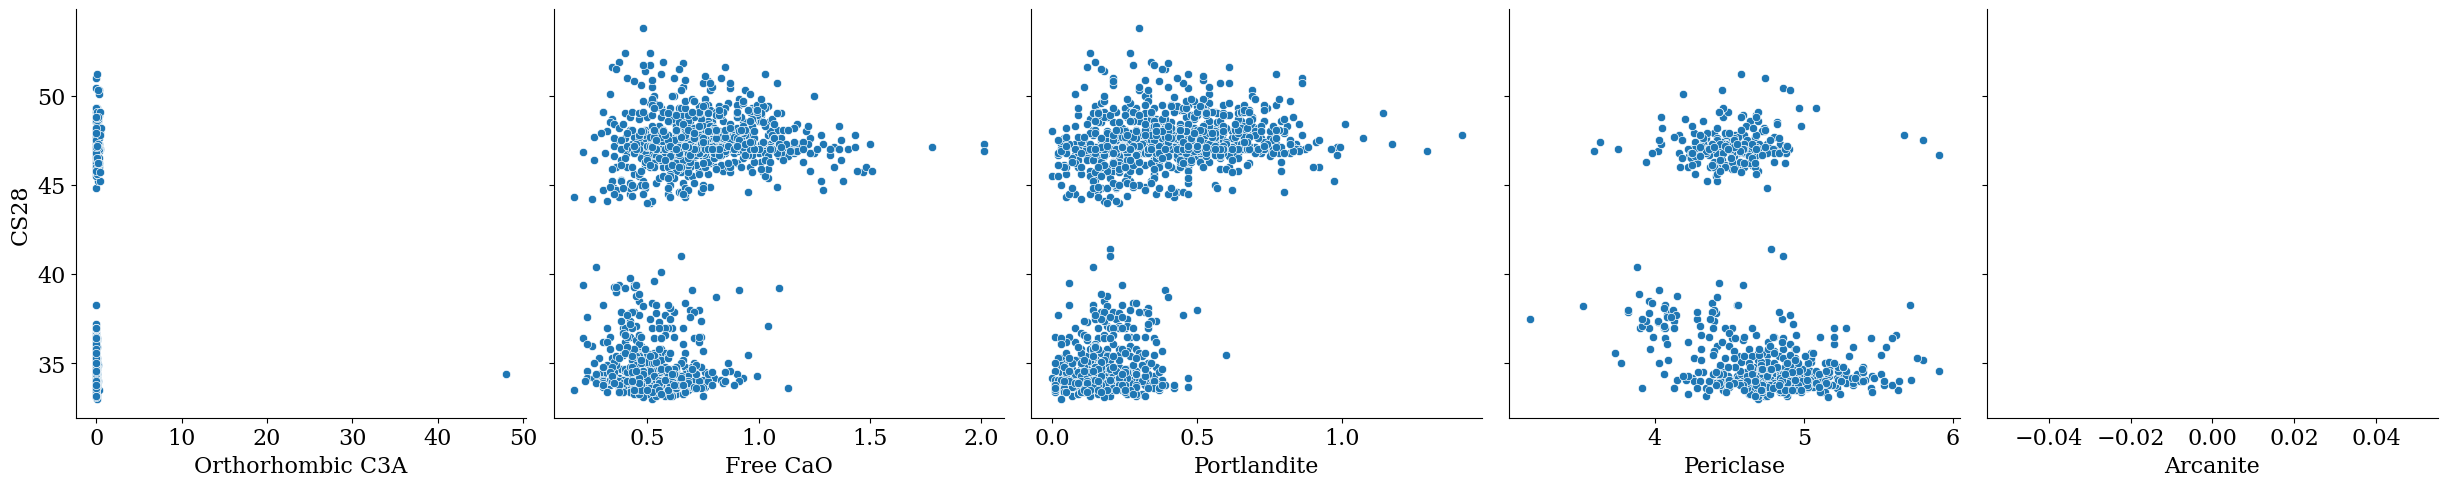

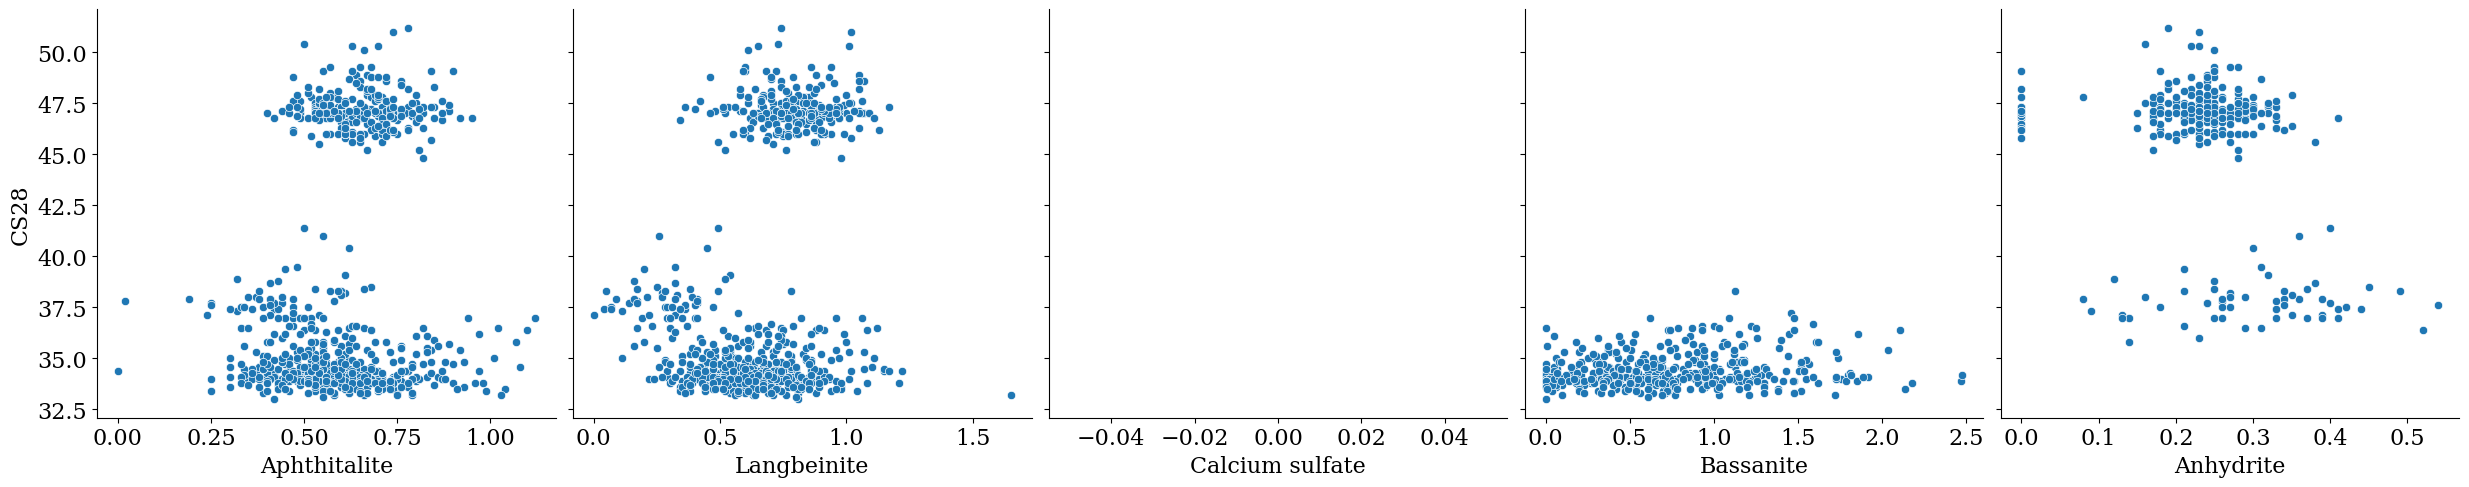

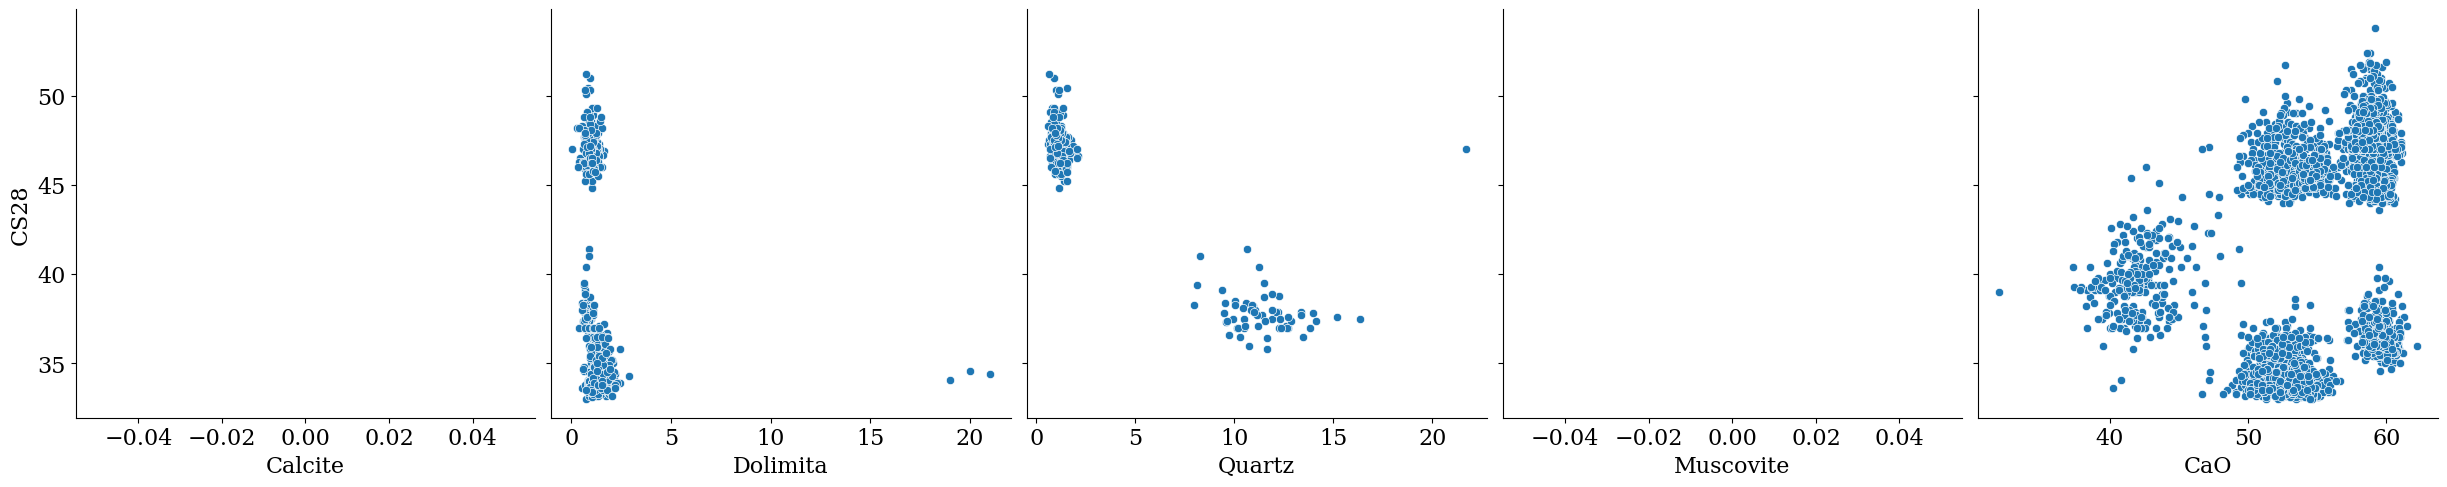

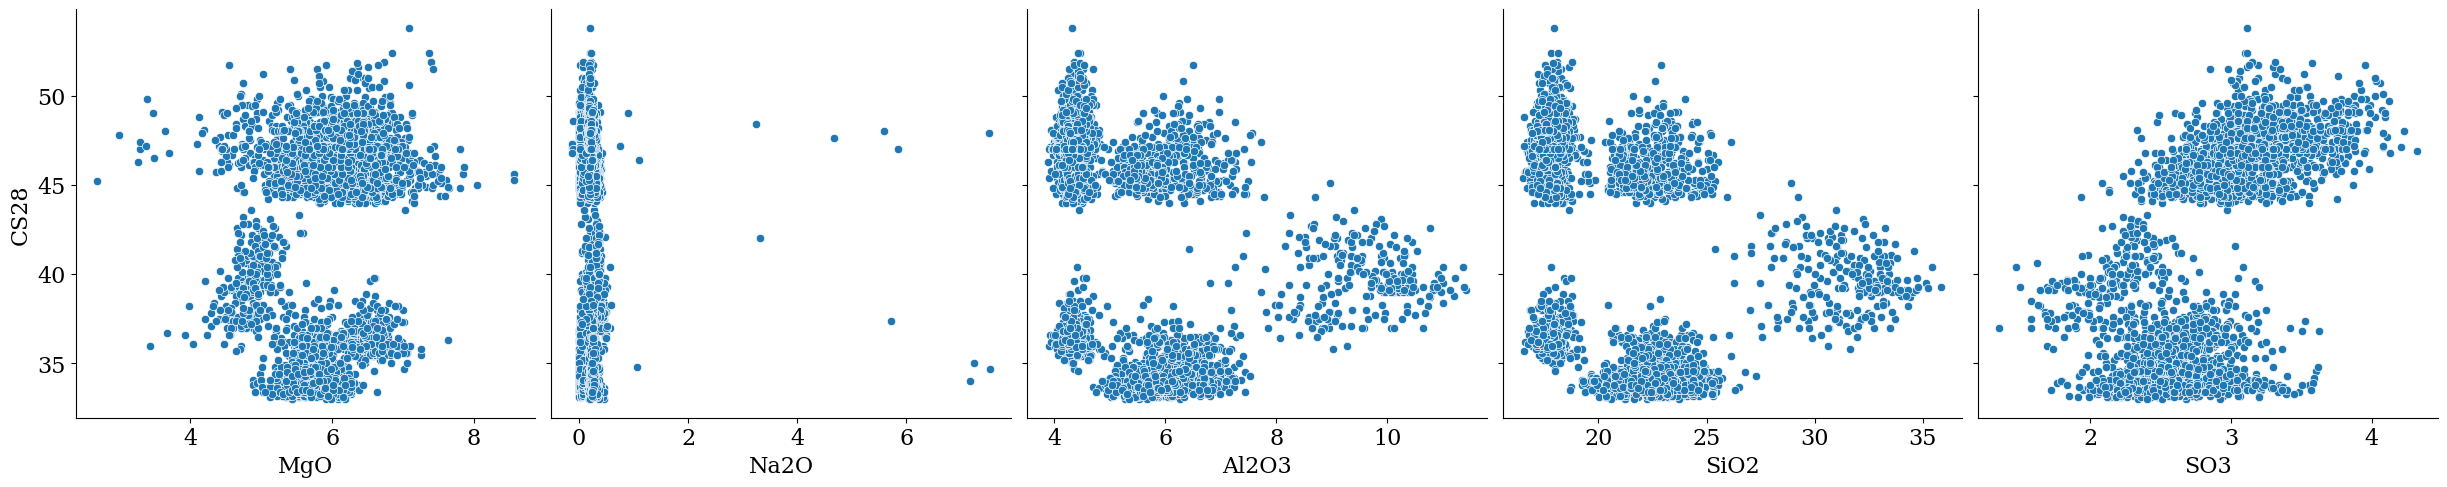

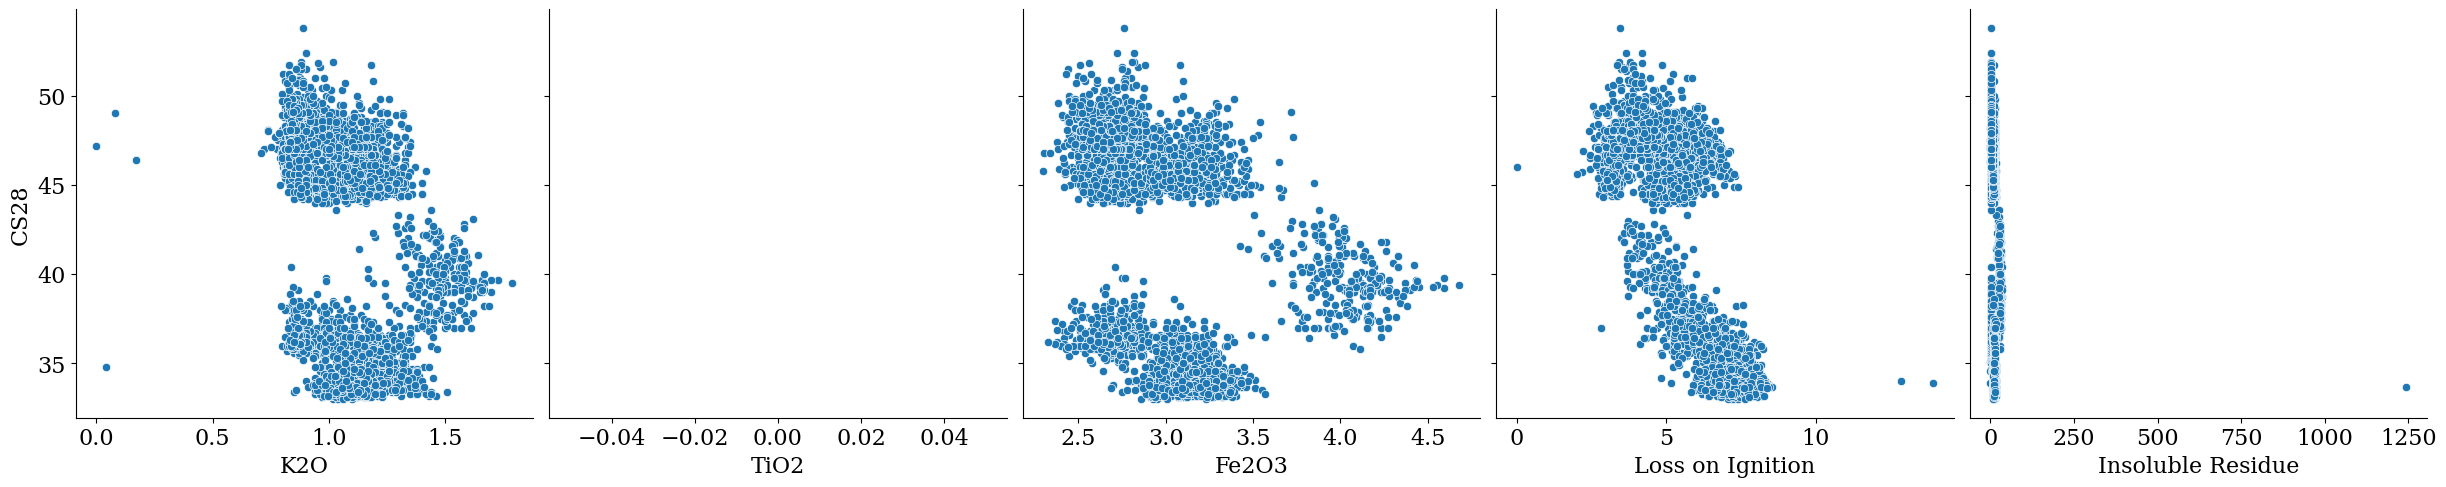

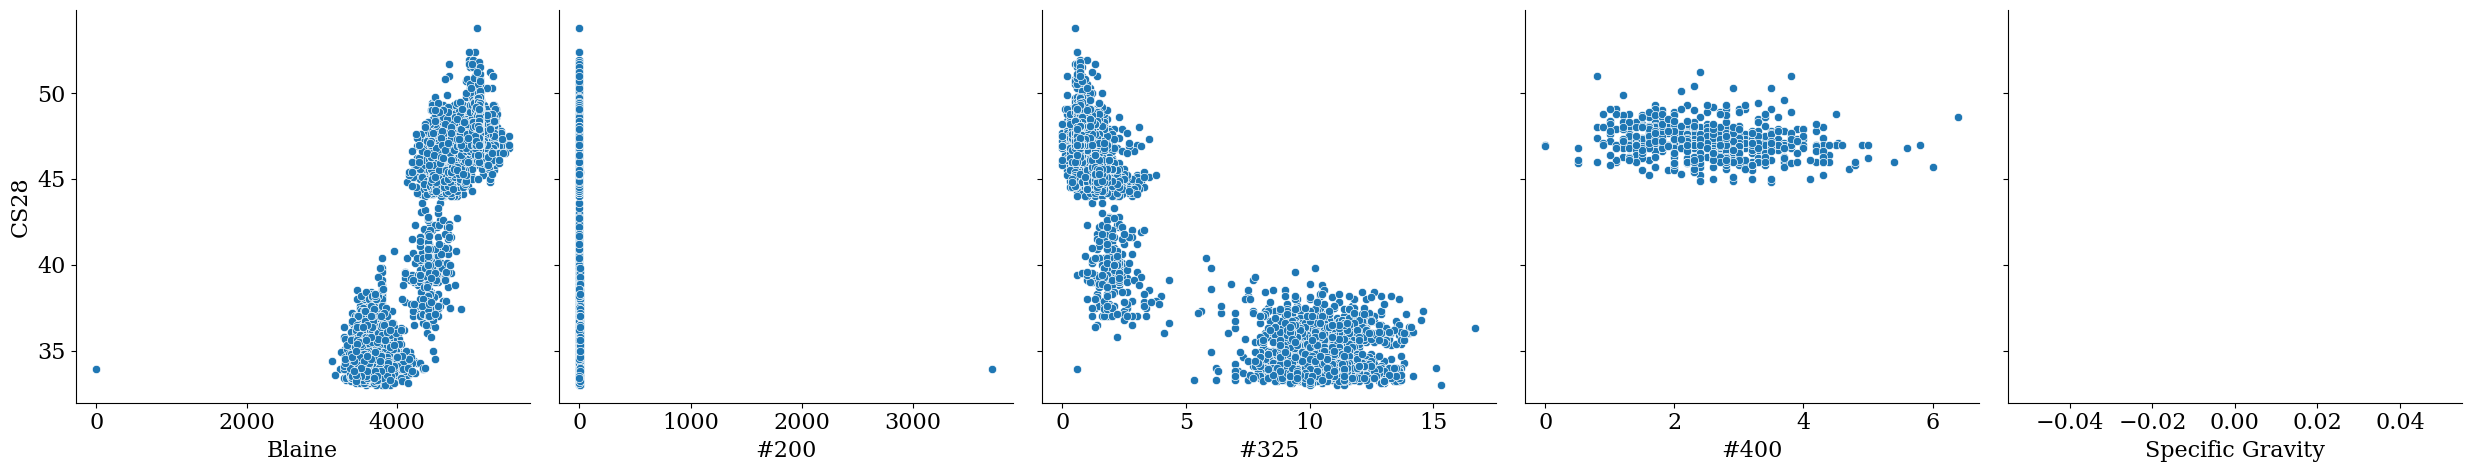

<IPython.core.display.Javascript object>

In [71]:
num_lines = 9
plots_per_line = 5

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("CS28")

warnings.filterwarnings("ignore")

for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["CS28"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

# grid.fig.suptitle(
#     "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
# )
plt.tight_layout()
plt.show()

In [72]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

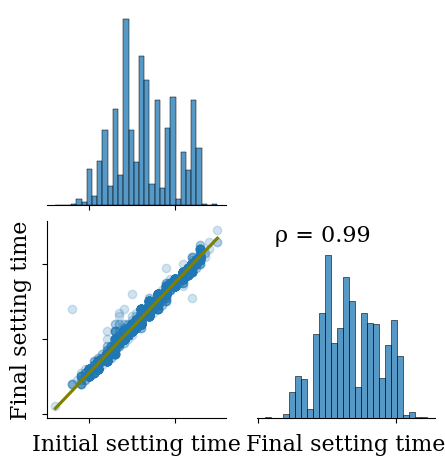

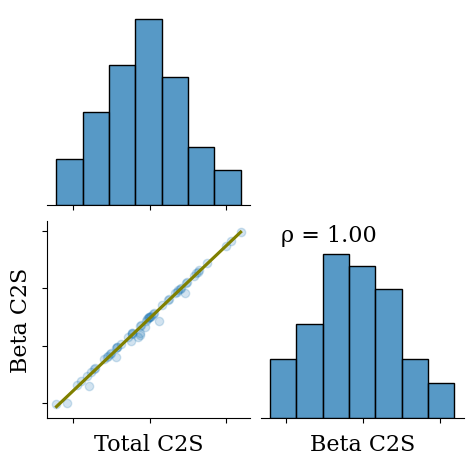

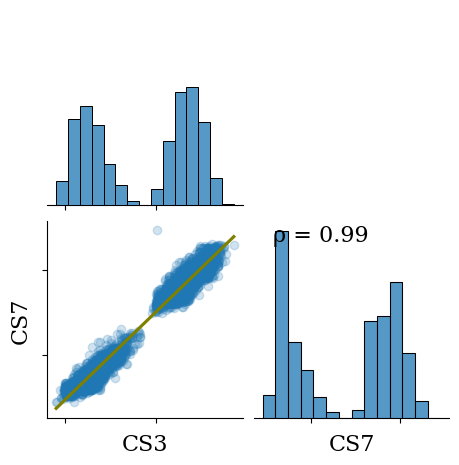

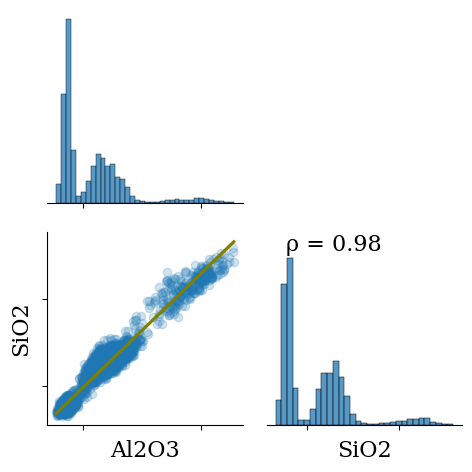

<IPython.core.display.Javascript object>

In [73]:
warnings.filterwarnings("ignore")

for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Date/TimeVariable Analyses

In [74]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

659 valid days out of 714


<IPython.core.display.Javascript object>

In [75]:
# What are the years the data was collected?
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2021, 2022, 2023}


<IPython.core.display.Javascript object>

In [76]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2023: {1, 2, 3, 4, 5, 6, 7, 8}}

<IPython.core.display.Javascript object>

In [77]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2021  1        21
      2        20
      3        24
      4        21
      5        22
      6        22
      7        23
      8        22
      9        22
      10       22
      11       21
      12       23
2022  1        22
      2        21
      3        23
      4        20
      5        23
      6        22
      7        21
      8        24
      9        24
      10       21
      11       23
      12       23
2023  1        23
      2        23
      3        26
      4        23
      5        26
      6        25
      7        26
      8        12
Name: Unique days per month, dtype: int64


<IPython.core.display.Javascript object>

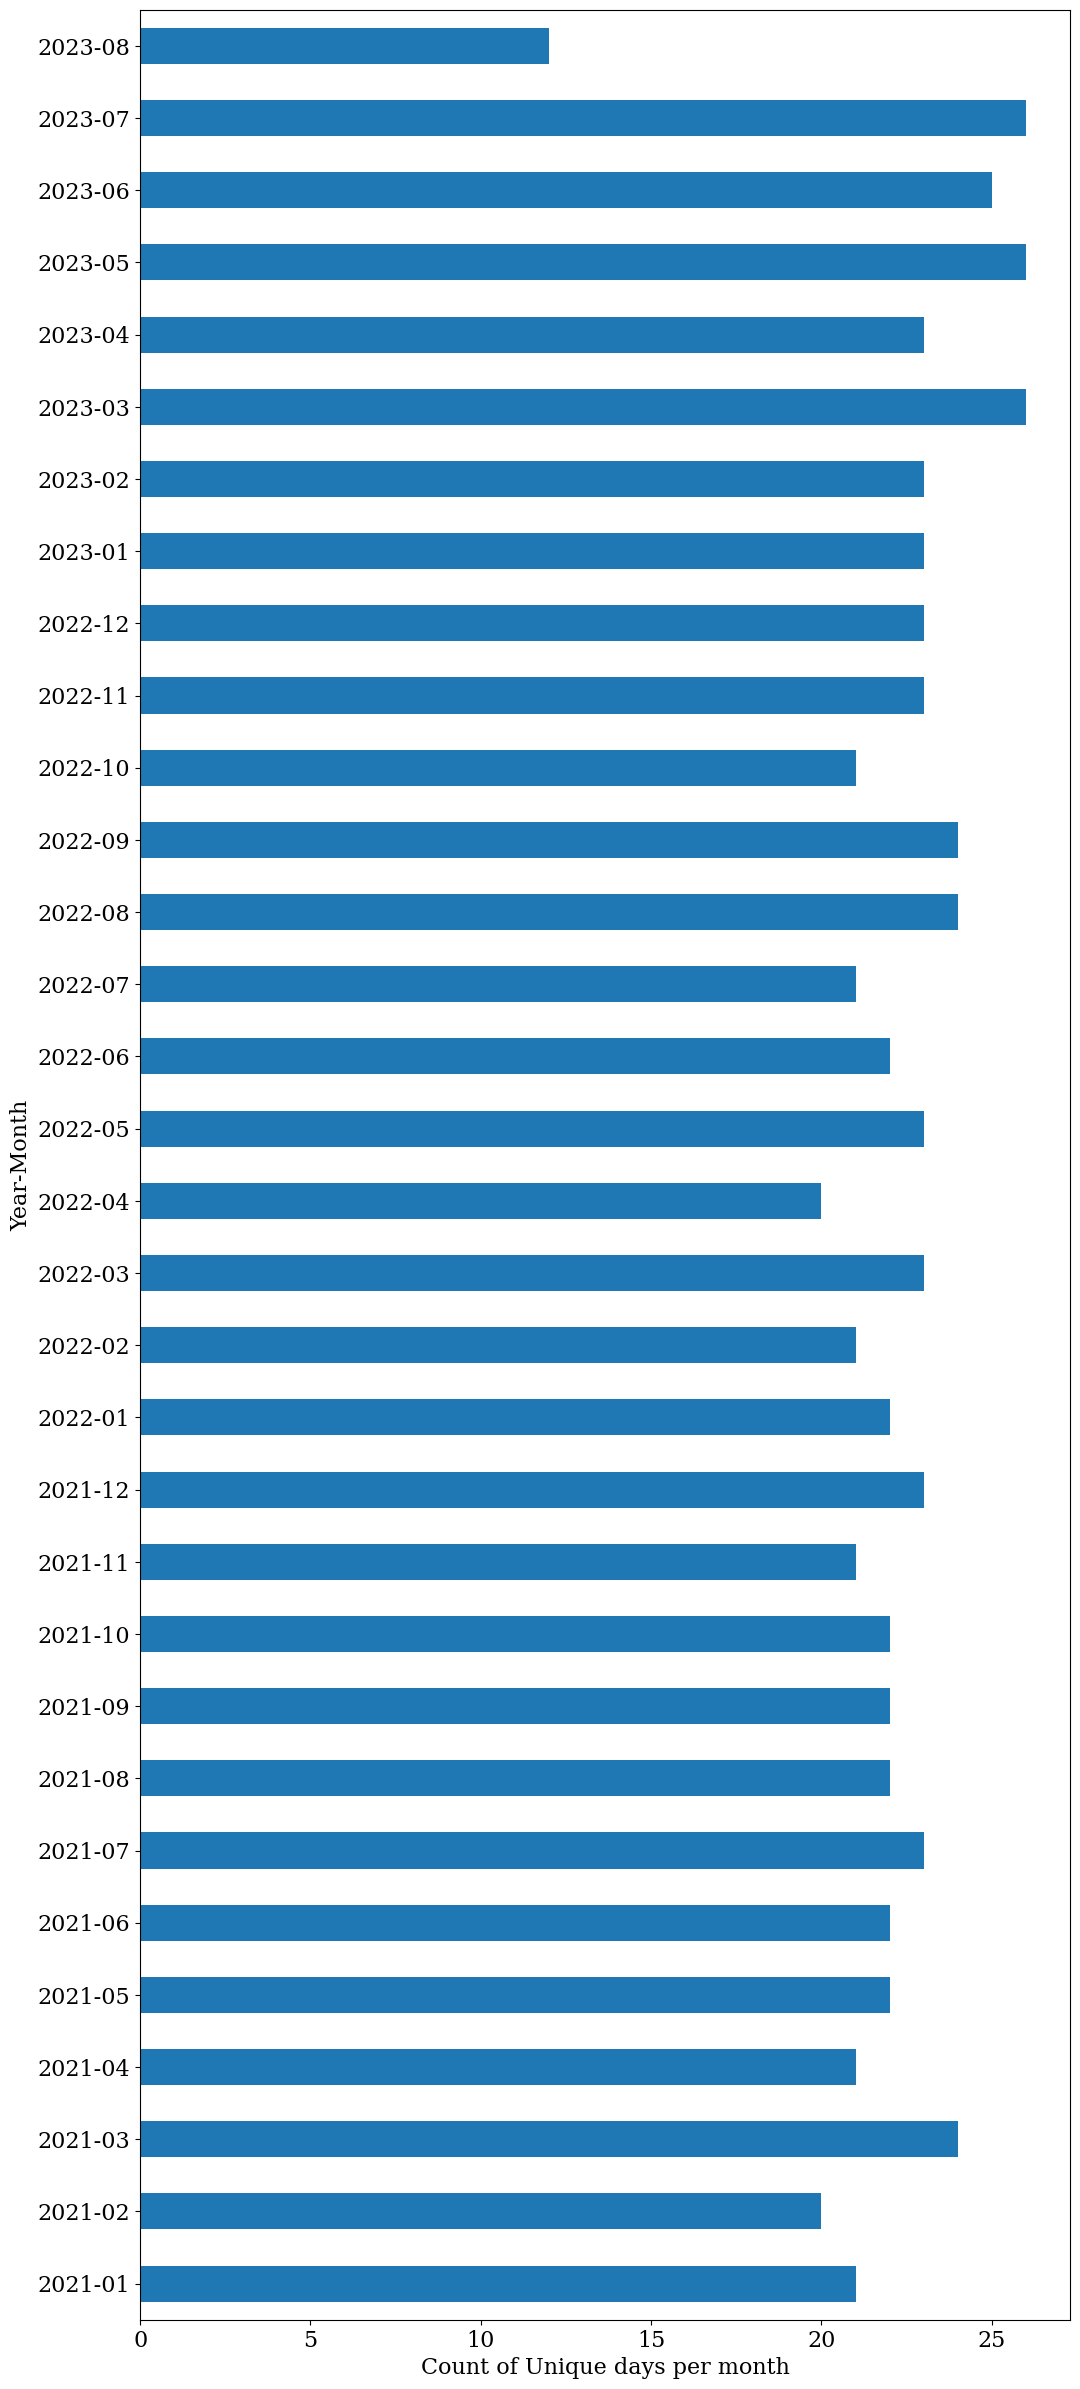

<IPython.core.display.Javascript object>

In [78]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(12, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [79]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2021  1        118
      2        119
      3        141
      4        120
      5        132
      6        122
      7        126
      8        123
      9        125
      10       120
      11       119
      12       124
2022  1        125
      2        119
      3        127
      4        129
      5        150
      6        146
      7        147
      8        151
      9        143
      10       135
      11       134
      12       146
2023  1        150
      2        131
      3        138
      4        109
      5        147
      6        135
      7        131
      8         58
Name: size, dtype: int64


<IPython.core.display.Javascript object>

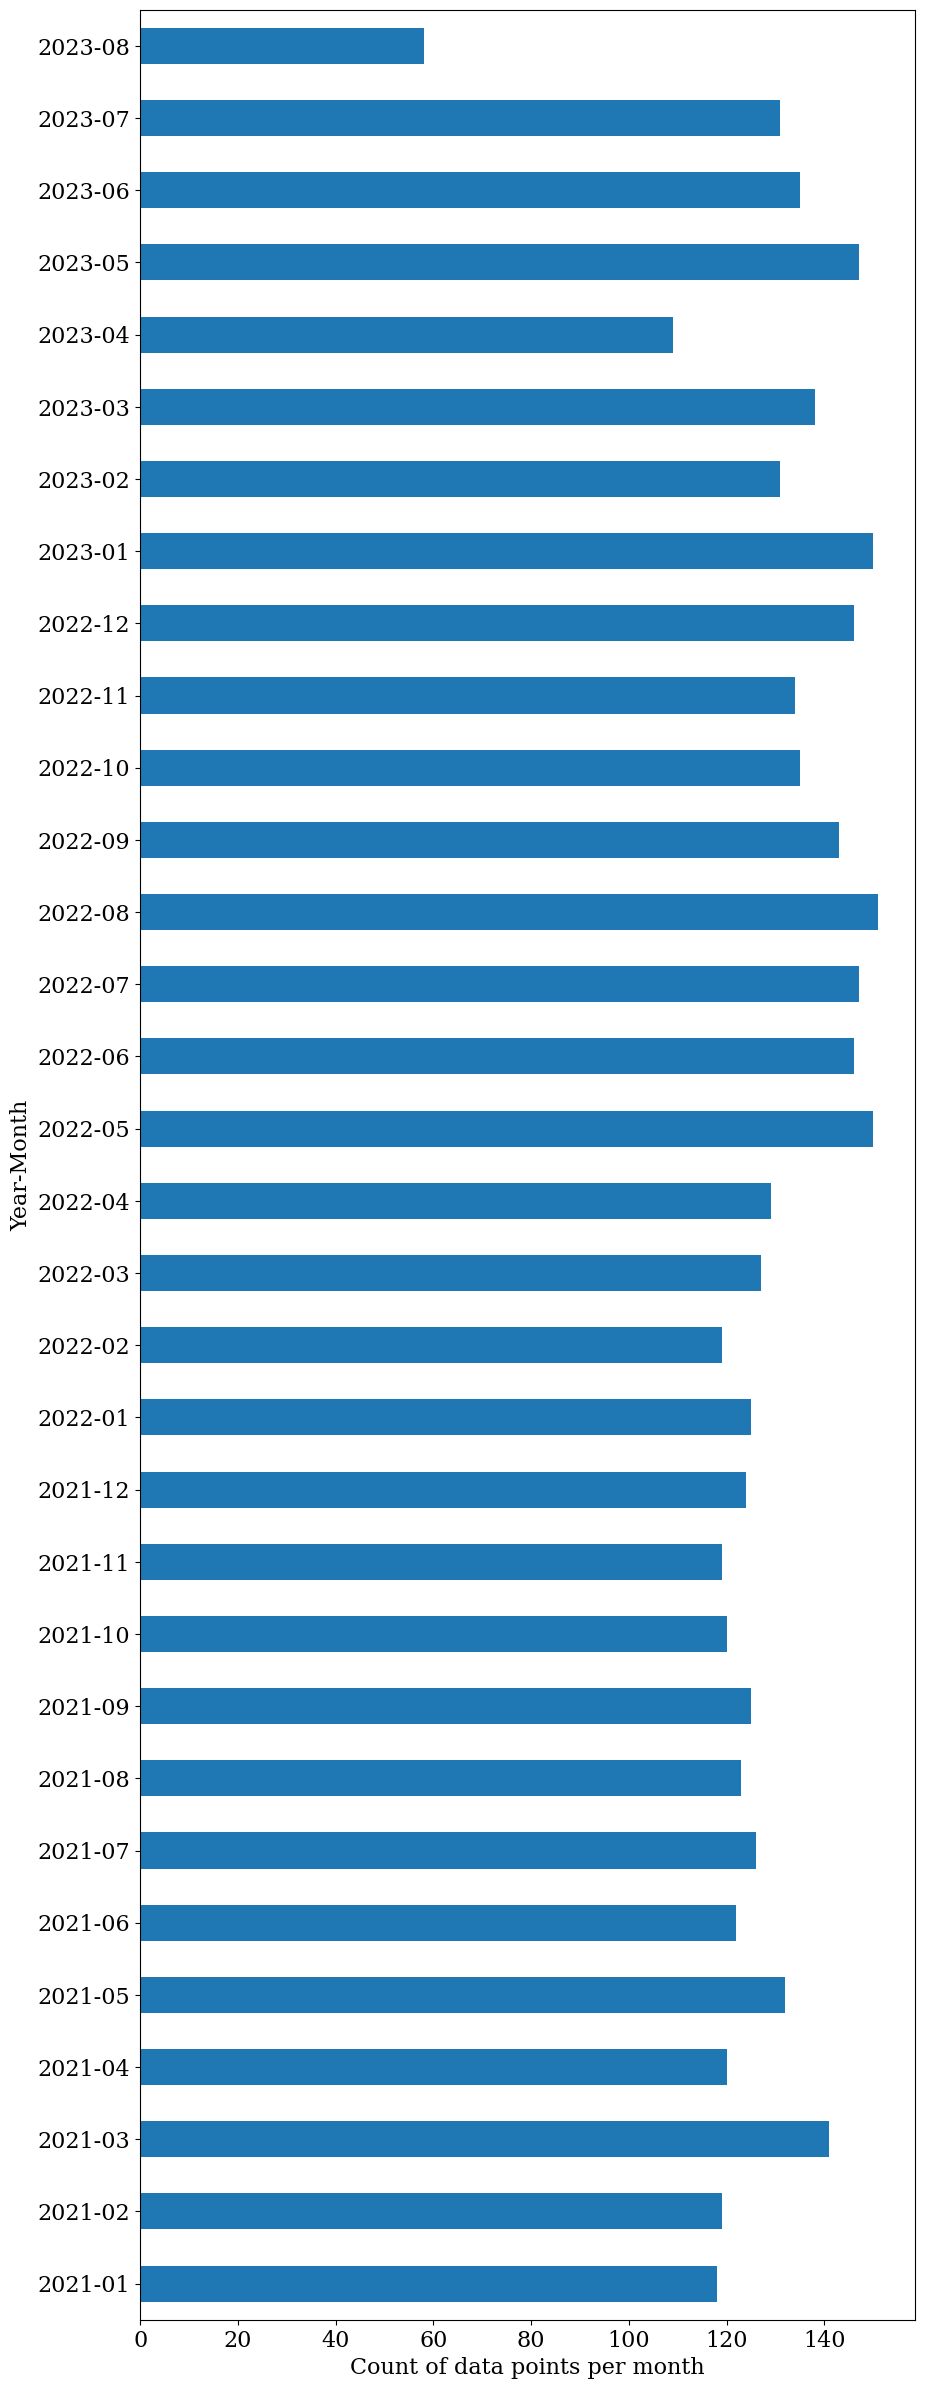

<IPython.core.display.Javascript object>

In [80]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [81]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2023-8 has the minimum number of days with samples - 58
2022-8 has the maximum number of days with samples - 151


<IPython.core.display.Javascript object>

In [82]:
# What is the mean number of observations per year?

mean_obs_per_year = df_year_month.groupby(["Year"]).mean(["size"]).apply(int).to_dict()

print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(df_year_month.mean()))

Mean Number of observations - per year
{2021: 124, 2022: 137, 2023: 124}

Mean number of observations - all years
129


<IPython.core.display.Javascript object>

In [83]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  714.000000
mean     5.798319
std      1.966393
min      1.000000
25%      5.000000
50%      6.000000
75%      7.000000
max      9.000000

<IPython.core.display.Javascript object>

In [84]:
day_counts[["DayCount"]].value_counts()

DayCount
6           190
7           147
8            98
5            97
4            76
1            54
9            32
3            16
2             4
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [85]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
7    2021      1   13         9
79   2021      4   22         9
86   2021      5    3         9
353  2022      5    6         9
369  2022      5   27         9
375  2022      6    6         9
385  2022      6   20         9
390  2022      6   27         9
394  2022      7    1         9
400  2022      7   11         9
410  2022      7   25         9
415  2022      8    1         9
428  2022      8   17         9
431  2022      8   22         9
436  2022      8   29         9
447  2022      9   12         9
451  2022      9   16         9
460  2022      9   28         9
465  2022     10    5         9
472  2022     10   14         9
473  2022     10   17         9
480  2022     10   26         9
486  2022     11    4         9
489  2022     11    9         9
530  2023      1    2         9
633  2023      5   11         9
645  2023      5   25         9
651  2023      6    1         9
655  2023      6    6         9
660  2023      6   13         9
674  2023      6   29         9
690  2023      7   18         9

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Day

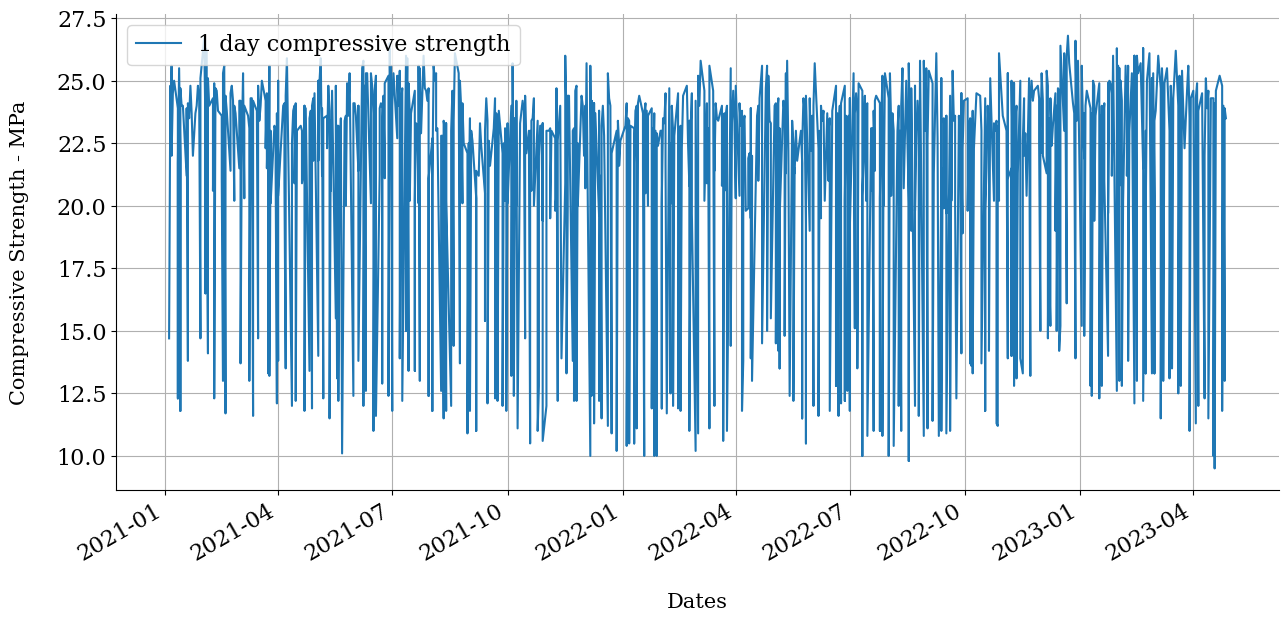

<IPython.core.display.Javascript object>

In [86]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

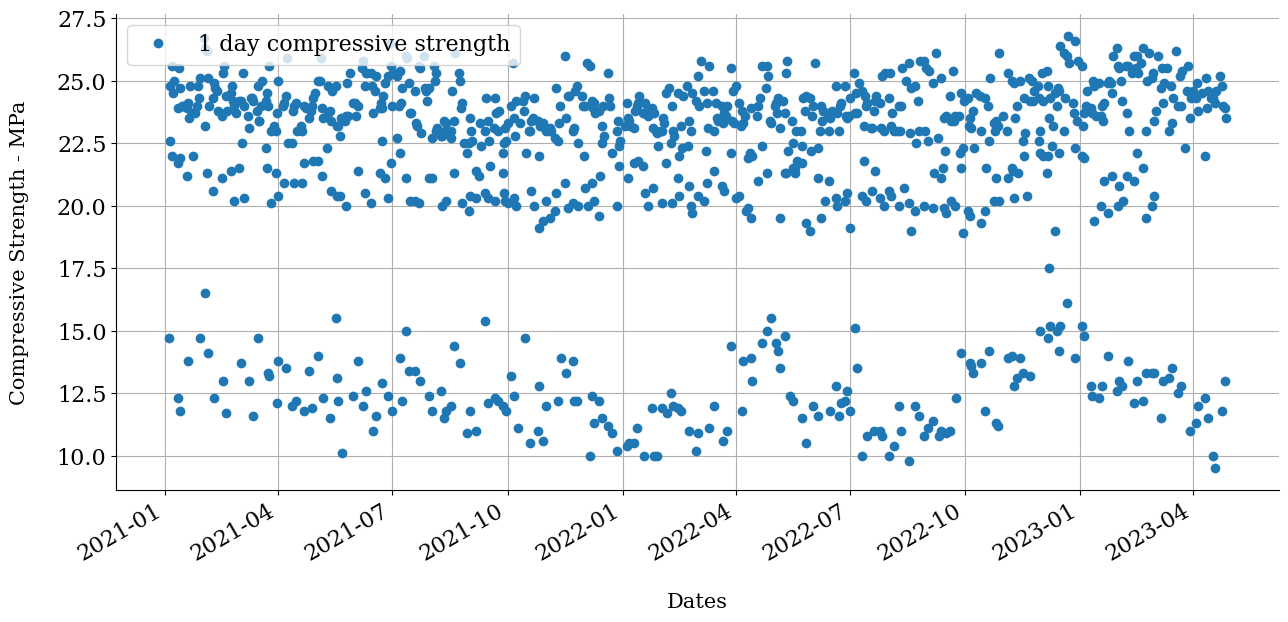

<IPython.core.display.Javascript object>

In [87]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax, marker="o", linestyle="")
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

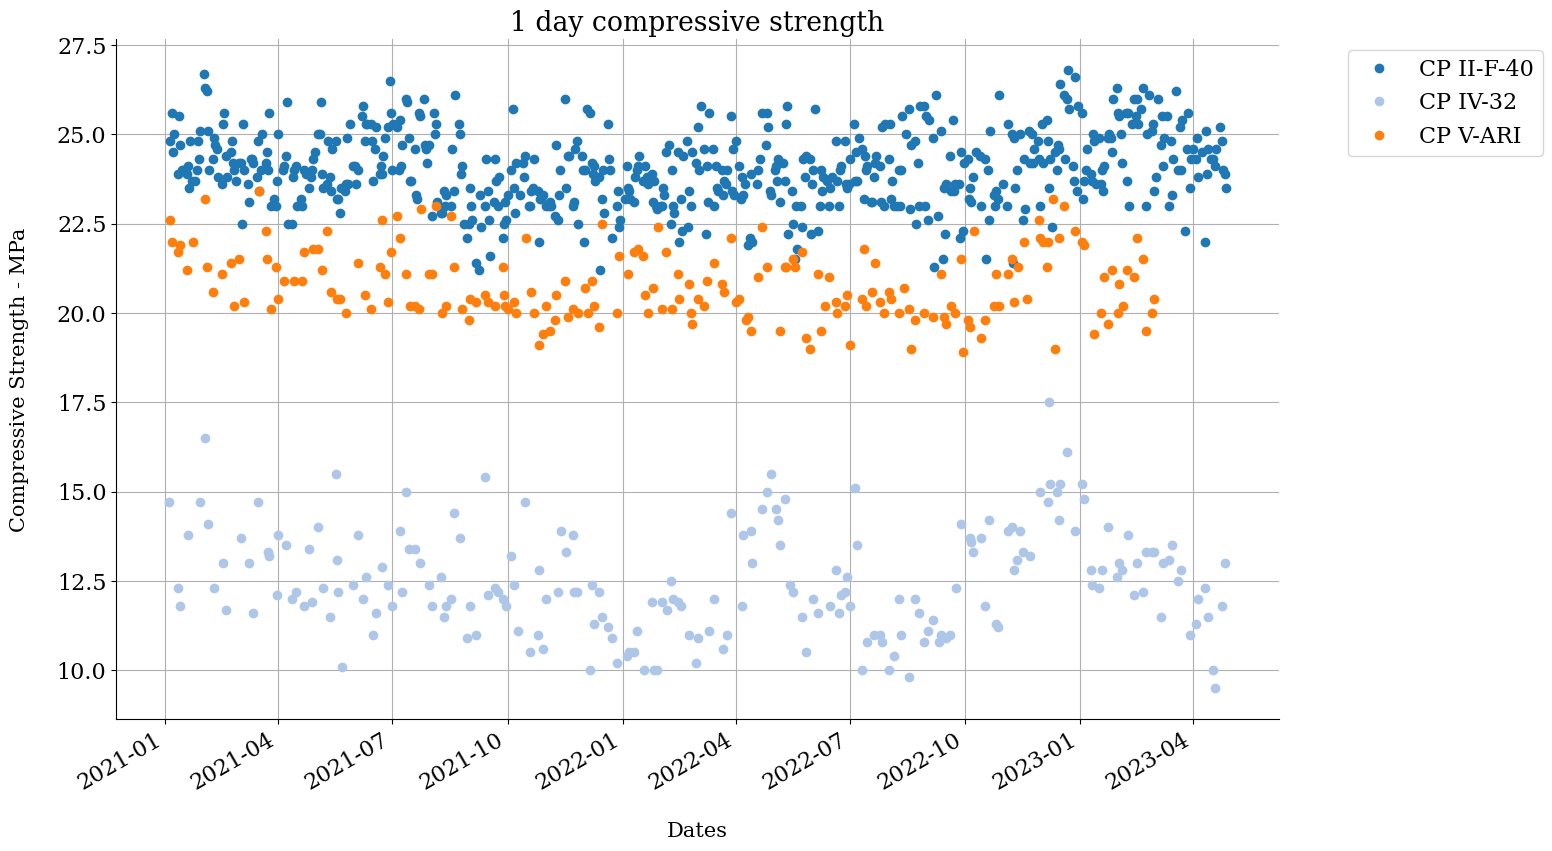

<IPython.core.display.Javascript object>

In [88]:
tmp = df[["Date", "CS1", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("1 day compressive strength")

plt.show()

#### 3 Days

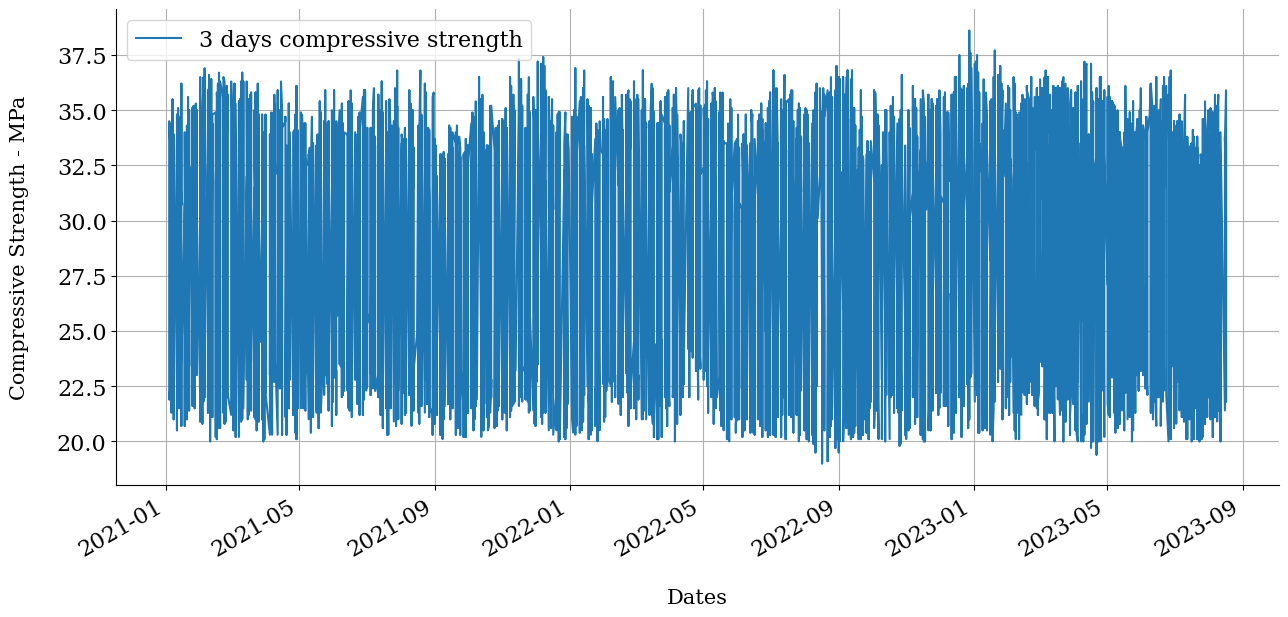

<IPython.core.display.Javascript object>

In [89]:
tmp = df[["Date", "CS3"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

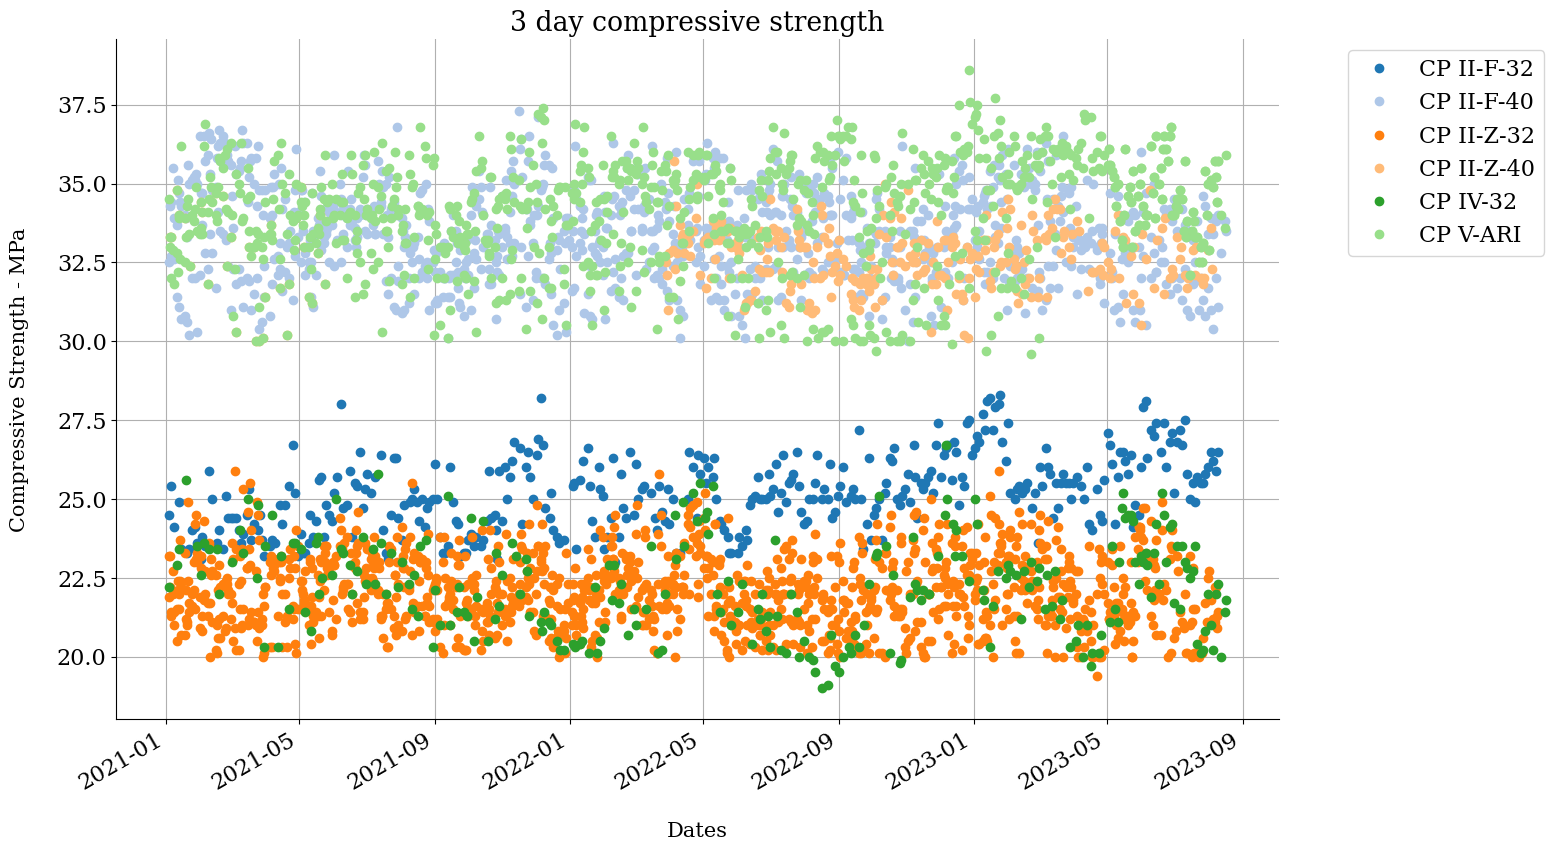

<IPython.core.display.Javascript object>

In [90]:
tmp = df[["Date", "CS3", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("3 day compressive strength")

plt.show()

#### 7 Days

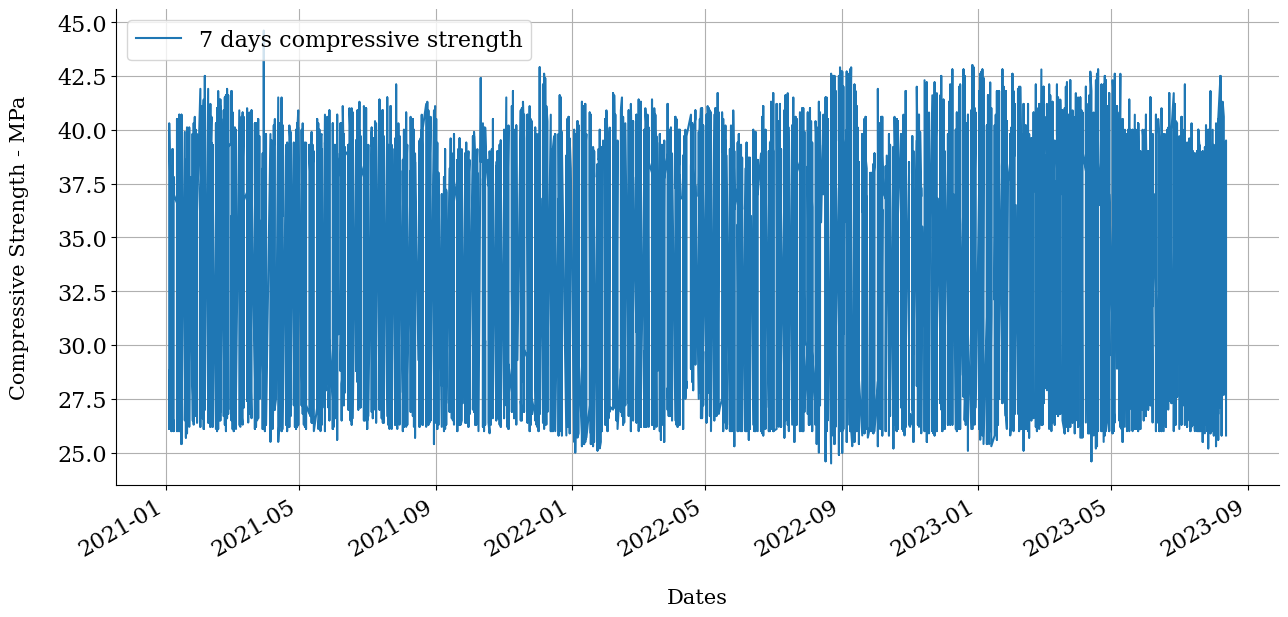

<IPython.core.display.Javascript object>

In [91]:
tmp = df[["Date", "CS7"]].dropna().copy()
tmp = tmp[tmp["CS7"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

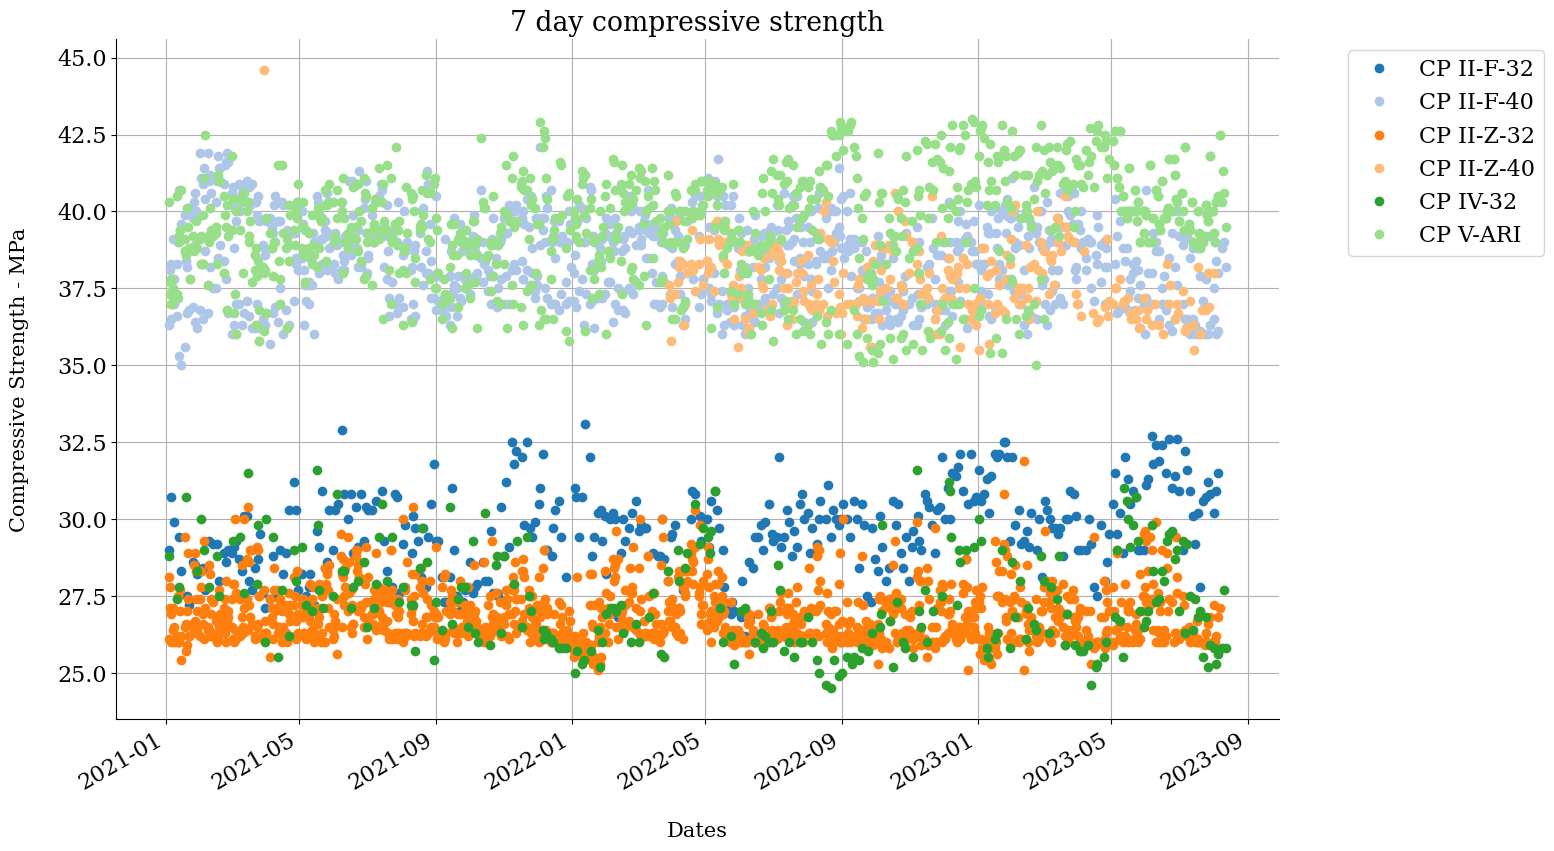

<IPython.core.display.Javascript object>

In [92]:
tmp = df[["Date", "CS7", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("7 day compressive strength")

plt.show()

#### 28 Days

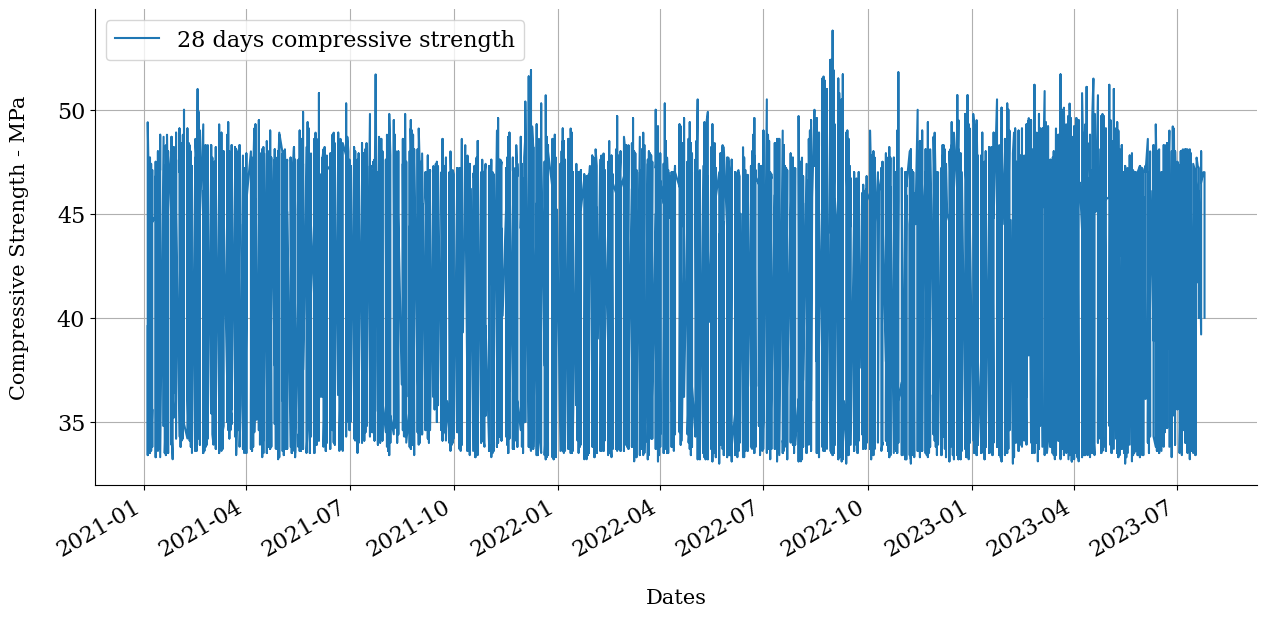

<IPython.core.display.Javascript object>

In [93]:
tmp = df[["Date", "CS28"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

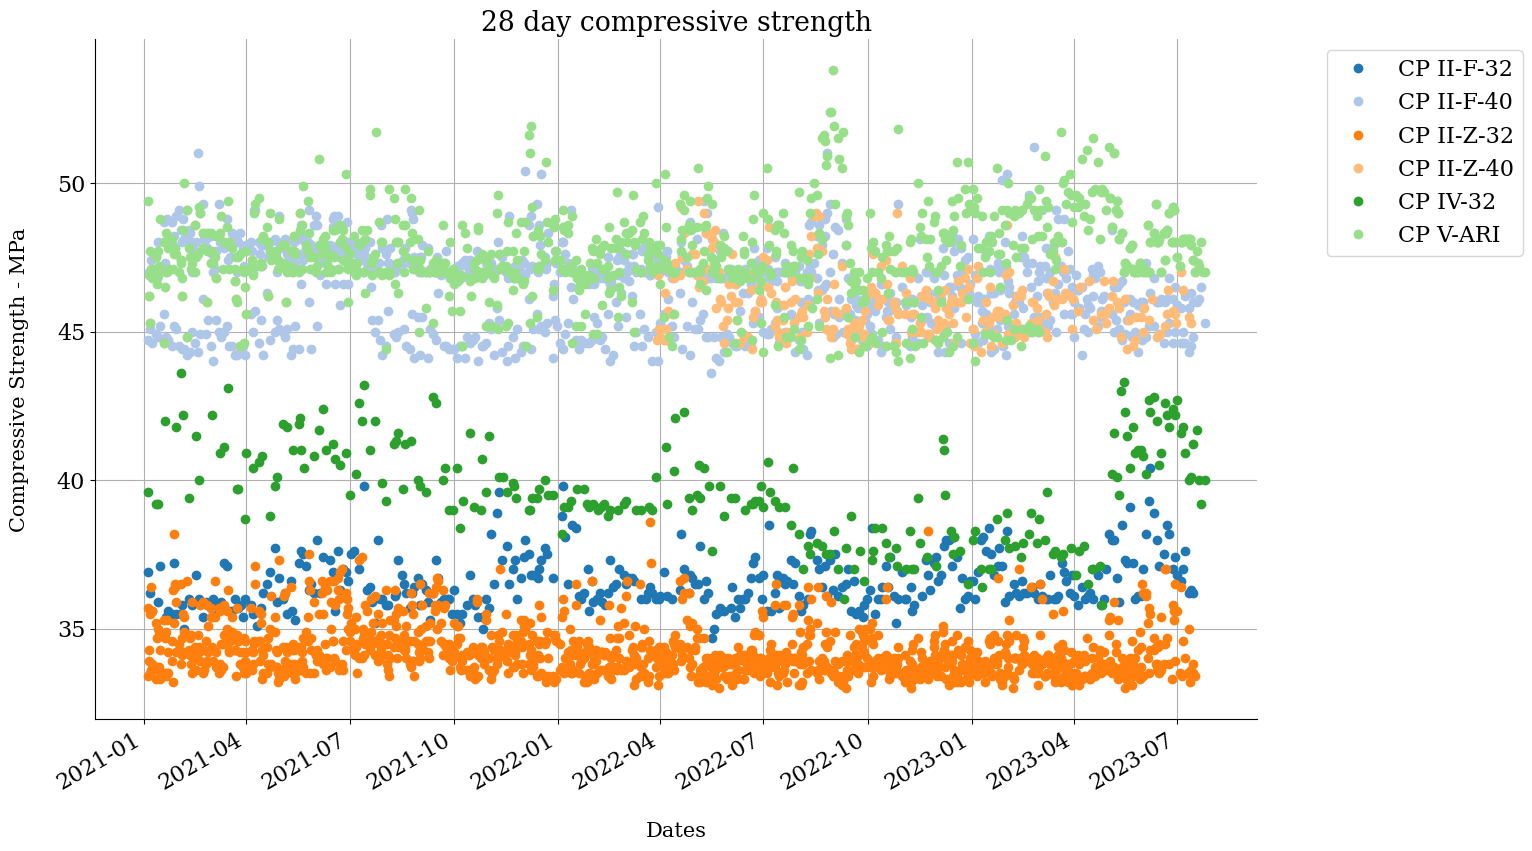

<IPython.core.display.Javascript object>

In [94]:
tmp = df[["Date", "CS28", "Cement_Type"]].dropna().copy()
tmp = tmp[tmp["CS28"] != 0].reset_index(drop=True)
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 10))

# Iterate through cement types and plot with unique colors and labels
colors = plt.cm.get_cmap("tab20").colors  # Choose a colormap with enough colors
labels = []  # Empty list to store cement type labels for legend
for i, (cement_type, group_data) in enumerate(tmp.groupby("Cement_Type")):
    labels.append(cement_type)  # Add cement type to labels list
    group_data.plot(ax=ax, marker="o", linestyle="", color=colors[i], label=cement_type)

ax.grid(which="both")
ax.legend(
    # title="1 day compressive strength",
    loc="upper left",
    bbox_to_anchor=(1.05, 1),
    labels=labels,
)  # Update legend with labels list
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_title("28 day compressive strength")

plt.show()